<a href="https://colab.research.google.com/github/pbhuch/GL_DecA_G4_NLP1/blob/main/GL_DecA_G4_NLP1_Final_With_MLandDL_Dec10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Great Learning : AIML Online Capstone -AUTOMATIC TICKET ASSIGNMENT

DecA : Group 4: NLP 1

Group Members :

1. Priya Moily
2. Priyanka Gupta
3. Avinash Balani
4. Priyank Bhuch

Importing relavant Libraries

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install ftfy
from time import time
from PIL import Image
from zipfile import ZipFile
import os, sys, itertools, re
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
import sklearn.neighbors._base

import imblearn
from imblearn.over_sampling import SMOTE

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.initializers import Constant
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Activation, Conv2D, MaxPooling2D, Reshape, Embedding, LSTM,  TimeDistributed, Bidirectional, Lambda, Input, Add, GlobalMaxPool1D
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import r2_score
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
#import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# to define loss
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log, epsilon

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

from itertools import islice

import re
import nltk
from nltk.corpus import stopwords

from ftfy import fix_encoding, fix_text, badness
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.utils import resample

import pickle, string

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import spacy

# Suppress warnings
import warnings; warnings.filterwarnings('ignore')

SEED = 123                 # to be able to rerun the same NN
np.random.seed(SEED)
tf.random.set_seed(SEED)

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None

! pip install langdetect
from langdetect import detect
from langdetect import detect
!pip install goslate
from goslate import Goslate
!pip install spacy
from collections import defaultdict
from bs4 import BeautifulSoup
import gensim
import gensim.corpora as corpora
#Remove stemming(snowball stemming) add lemmatistaion using simple_process from gensim 
from gensim.utils import simple_preprocess
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

     |████████████████████████████████| 64 kB 1.6 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=db9050ed60cc21c4f59ab192f5ade62a9ab383e3048133f211831c6be9c6c7d7
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


     |████████████████████████████████| 981 kB 2.0 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=6161767995da29d76bd7de8a16a4f0d16ae4062db926a8126909284a6106e2f5
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect
  Created wheel for goslate: filename=goslate-1.5.2-py3-none-any.whl size=11436 sha256=d0674ba84520a5b858ba1458542cd82376d278efde09276211c762f2b2f1dab6
  Stored in directory: /root/.cache/pip/wheels/a8/8a/c4/85425eac5e0746fd5fc898801858331e55ac386f476d65e58d
Successfully built goslate


In [5]:
dataset = pd.read_excel('/content/sample_data/input_data.xlsx')
dataset.shape

(8500, 4)

In [6]:
dataset.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [7]:
dataset[pd.isnull(dataset).any(axis=1)]

Short description  \
2604                       NaN   
3383                       NaN   
3906                       NaN   
3910                       NaN   
3915                       NaN   
3921                       NaN   
3924                       NaN   
4341                       NaN   
4395  i am locked out of skype   

                                            Description             Caller  \
2604  \r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...  ohdrnswl rezuibdt   
3383  \r\n-connected to the user system using teamvi...  qftpazns fxpnytmk   
3906  -user unable  tologin to vpn.\r\n-connected to...  awpcmsey ctdiuqwe   
3910  -user unable  tologin to vpn.\r\n-connected to...  rhwsmefo tvphyura   
3915  -user unable  tologin to vpn.\r\n-connected to...  hxripljo efzounig   
3921  -user unable  tologin to vpn.\r\n-connected to...  cziadygo veiosxby   
3924  name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...  wvqgbdhm fwchqjor   
4341  \r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...  eqmuniov ehxkcbgj   
4395                                                NaN  viyglzfo ajtfzpkb   

     Assignment group  
2604           GRP_34  
3383            GRP_0  
3906            GRP_0  
3910            GRP_0  
3915            GRP_0  
3921            GRP_0  
3924            GRP_0  
4341            GRP_0  
4395            GRP_0

In [8]:
dataset.fillna(str(), inplace=True)
dataset.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

In [9]:
duplicate = dataset[dataset.duplicated()]

In [10]:
duplicate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 51 to 8405
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  83 non-null     object
 1   Description        83 non-null     object
 2   Caller             83 non-null     object
 3   Assignment group   83 non-null     object
dtypes: object(4)
memory usage: 3.2+ KB


In [11]:
dataset1 = dataset[~dataset.duplicated()]

In [12]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
dtypes: object(4)
memory usage: 328.8+ KB


In [13]:
dataset1.head(20)

Short description  \
0                                         login issue   
1                                             outlook   
2                                  cant log in to vpn   
3                       unable to access hr_tool page   
4                                        skype error    
5      unable to log in to engineering tool and skype   
6   event: critical:HostName_221.company.com the v...   
7   ticket_no1550391- employment status - new non-...   
8                unable to disable add ins on outlook   
9                     ticket update on inplant_874773   
10  engineering tool says not connected and unable...   
11            hr_tool site not loading page correctly   
12  unable to login to hr_tool to sgxqsuojr xwbeso...   
13                   user wants to reset the password   
14                           unable to open payslips    
15                    ticket update on inplant_874743   
16                     unable to login to company vpn   
17      when undocking pc , screen will not come back   
18                          erp SID_34 account locked   
19                            unable to sign into vpn   

                                          Description             Caller  \
0   -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1   \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...  hmjdrvpb komuaywn   
2   \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...  eylqgodm ybqkwiam   
3                       unable to access hr_tool page  xbkucsvz gcpydteq   
4                                        skype error   owlgqjme qhcozdfx   
5      unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6   event: critical:HostName_221.company.com the v...  jyoqwxhz clhxsoqy   
7   ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
8                unable to disable add ins on outlook  mdbegvct dbvichlg   
9                     ticket update on inplant_874773  fumkcsji sarmtlhy   
10  engineering tool says not connected and unable...  badgknqs xwelumfz   
11            hr_tool site not loading page correctly  dcqsolkx kmsijcuz   
12  unable to login to hr_tool to sgxqsuojr xwbeso...  oblekmrw qltgvspb   
13                   user wants to reset the password  iftldbmu fujslwby   
14                           unable to open payslips   epwyvjsz najukwho   
15                    ticket update on inplant_874743  fumkcsji sarmtlhy   
16  \n\nreceived from: xyz@company.com\n\nhi,\n\ni...  chobktqj qdamxfuc   
17      when undocking pc , screen will not come back  sigfdwcj reofwzlm   
18                          erp SID_34 account locked  nqdyowsm yqerwtna   
19                            unable to sign into vpn  ftsqkvre bqzrupic   

   Assignment group  
0             GRP_0  
1             GRP_0  
2             GRP_0  
3             GRP_0  
4             GRP_0  
5             GRP_0  
6             GRP_1  
7             GRP_0  
8             GRP_0  
9             GRP_0  
10            GRP_0  
11            GRP_0  
12            GRP_0  
13            GRP_0  
14            GRP_0  
15            GRP_0  
16            GRP_0  
17            GRP_3  
18            GRP_0  
19            GRP_0

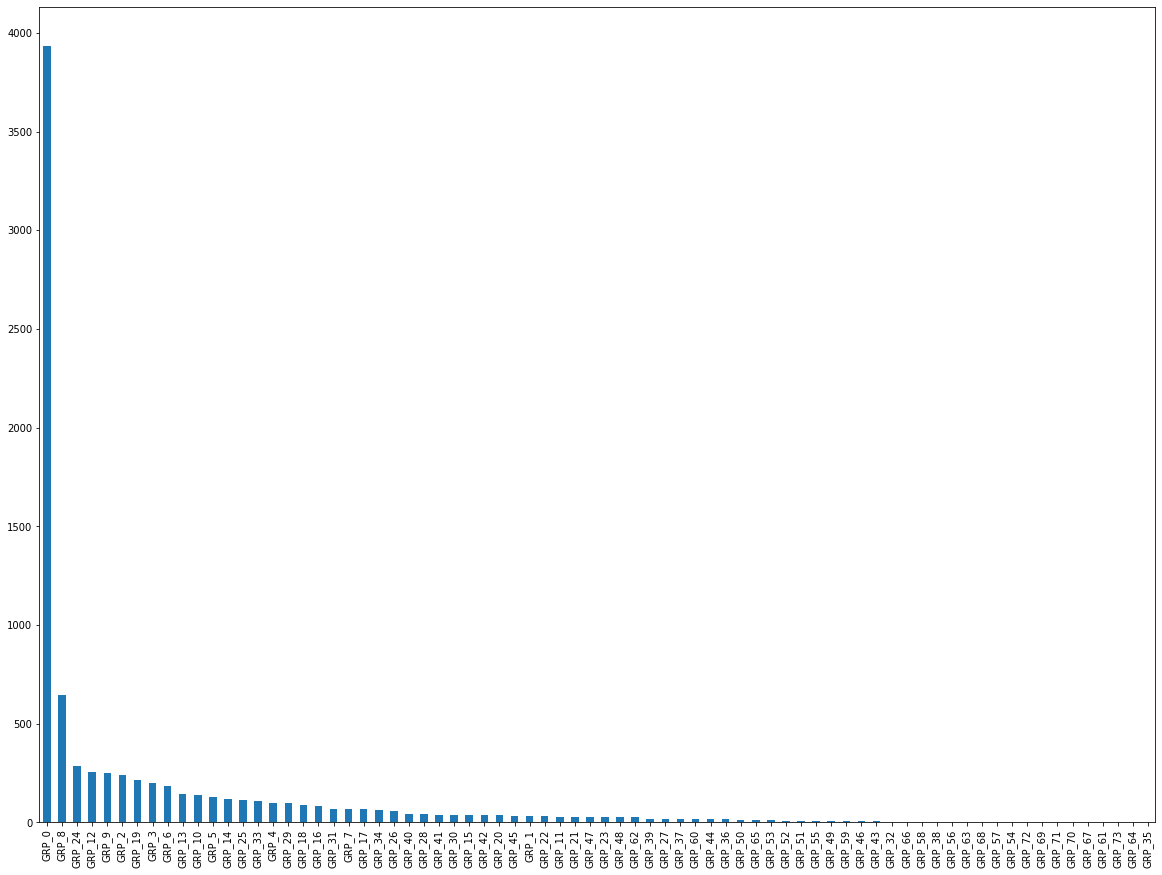

In [14]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts().plot(kind='bar')

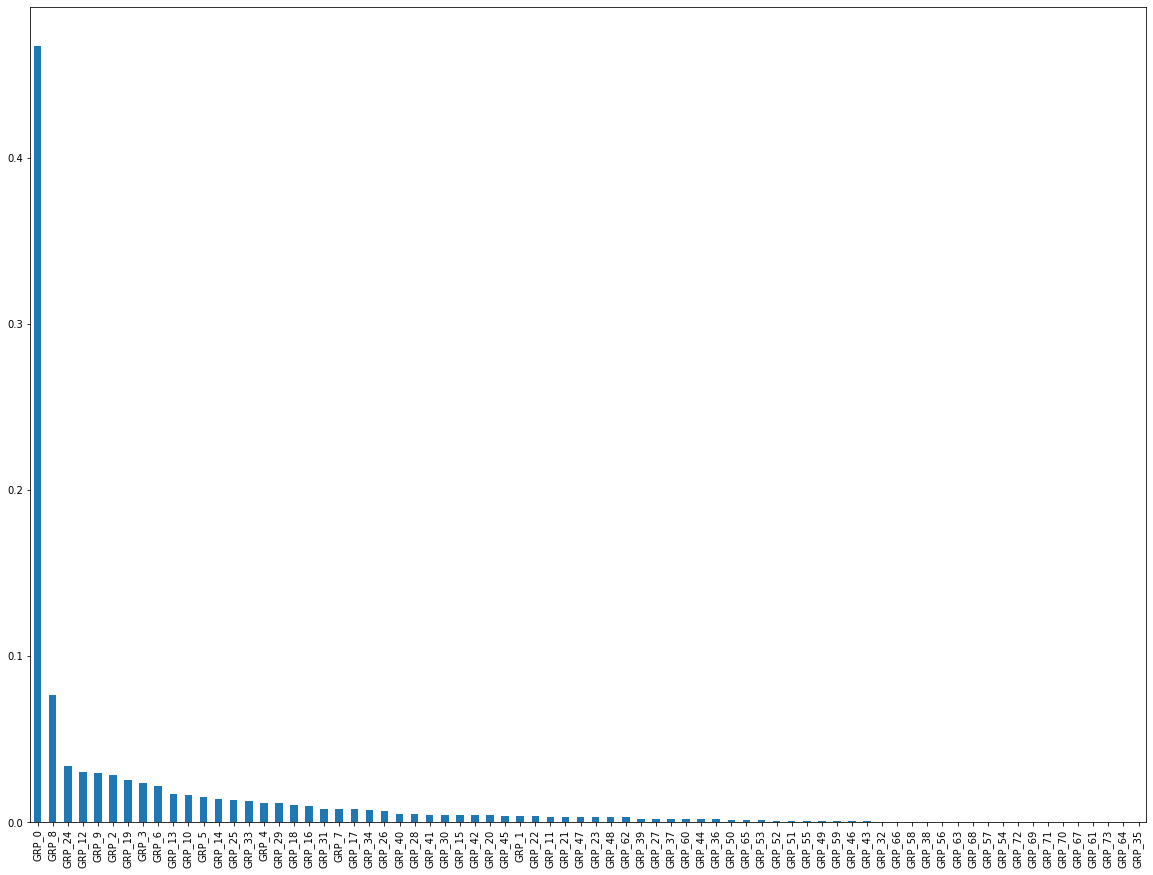

In [15]:
plt.figure(figsize=(20,15))
dataset1['Assignment group'].value_counts(normalize=True).plot(kind='bar')

In [16]:
display(dataset1['Assignment group'].value_counts(normalize=True))

GRP_0     0.467387
GRP_8     0.076631
GRP_24    0.033860
GRP_12    0.030533
GRP_9     0.029939
GRP_2     0.028633
GRP_19    0.025544
GRP_3     0.023761
GRP_6     0.021742
GRP_13    0.017227
GRP_10    0.016633
GRP_5     0.015207
GRP_14    0.014019
GRP_25    0.013782
GRP_33    0.012712
GRP_4     0.011881
GRP_29    0.011524
GRP_18    0.010455
GRP_16    0.010099
GRP_31    0.008198
GRP_7     0.008079
GRP_17    0.008079
GRP_34    0.007366
GRP_26    0.006653
GRP_40    0.005346
GRP_28    0.005228
GRP_41    0.004752
GRP_30    0.004633
GRP_15    0.004515
GRP_42    0.004396
GRP_20    0.004277
GRP_45    0.004158
GRP_1     0.003683
GRP_22    0.003683
GRP_11    0.003564
GRP_21    0.003327
GRP_47    0.003208
GRP_23    0.002970
GRP_48    0.002970
GRP_62    0.002970
GRP_39    0.002257
GRP_27    0.002139
GRP_37    0.001901
GRP_60    0.001901
GRP_44    0.001782
GRP_36    0.001782
GRP_50    0.001663
GRP_65    0.001307
GRP_53    0.001307
GRP_52    0.001069
GRP_51    0.000950
GRP_55    0.000950
GRP_49    0.

In [17]:
# Top 5 callers in each assignment group
top_n = 5
df_sample2 = dataset1['Caller'].groupby(dataset1['Assignment group']).value_counts()
caller_grp = pd.DataFrame(df_sample2.groupby(level=0).nlargest(top_n).reset_index(level=0, drop=True))
caller_grp.head(15)

Caller
Assignment group Caller                   
GRP_0            fumkcsji sarmtlhy     126
                 rbozivdq gmlhrtvp      71
                 olckhmvx pcqobjnd      47
                 efbwiadp dicafxhv      45
                 mfeyouli ndobtzpw      13
GRP_1            bpctwhsn kzqsbmtp       6
                 jloygrwh acvztedi       4
                 jyoqwxhz clhxsoqy       3
                 spxqmiry zpwgoqju       3
                 kbnfxpsy gehxzayq       2
GRP_10           bpctwhsn kzqsbmtp      60
                 ihfkwzjd erbxoyqk       6
                 dizquolf hlykecxa       5
                 gnasmtvx cwxtsvkm       3
                 hlrmufzx qcdzierm       3

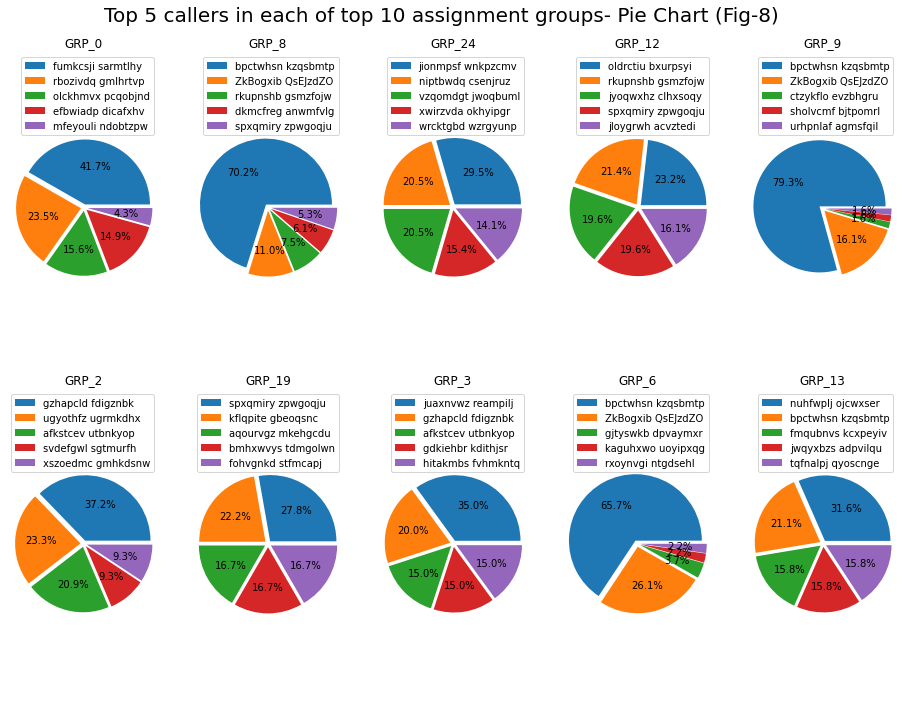

In [18]:
# Visualize Top 5 callers in each of top 10 assignment groups
top_n = 10
df_sample3 = pd.DataFrame(dataset1.groupby('Assignment group').size(),columns = ['Count']).reset_index()
top_grps = df_sample3.nlargest(top_n, 'Count')['Assignment group'].tolist()

fig_cols = 5
fig_rows = int(np.ceil(top_n/fig_cols))
fig, axes = plt.subplots(fig_rows, fig_cols, figsize=(13,9.5))
fig.suptitle('Top 5 callers in each of top 10 assignment groups- Pie Chart (Fig-8)', y=1, va= 'bottom', size='20')
for row in range(fig_rows):
    for col in range(fig_cols):
        grp_n = fig_cols * row + col
        if grp_n < top_n:
            xs = caller_grp.xs(top_grps[grp_n])
            _ = axes[row,col].pie(xs, autopct='%1.1f%%', explode=[0.05]*5)
            axes[row,col].legend(labels=xs.index,loc="best")
            axes[row,col].axis('equal')
            axes[row,col].set_title(top_grps[grp_n])

plt.tight_layout()

In [19]:
# Write a function to apply to the dataset to detect Mojibakes
def is_mojibake_impacted(text):
    if not badness.sequence_weirdness(text):
        # nothing weird, should be okay
        return True
    try:
        text.encode('sloppy-windows-1252')
    except UnicodeEncodeError:
        # Not CP-1252 encodable, probably fine
        return True
    else:
        # Encodable as CP-1252, Mojibake alert level high
        return False

In [20]:
# Check the dataset for mojibake impact
dataset1[~dataset1.iloc[:,:].applymap(is_mojibake_impacted).all(1)]

Short description  \
99                             password expiry tomorrow   
116                                       server issues   
124                            mobile device activation   
162                                       access to bex   
164          æ’¤å›ž: ticket_no1564867 -- comments added   
170        [urgent!!] delivery note creation request!!    
177   unable to access password_management_tool id p...   
186   é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è...   
222            support fÃ¼r fa.gstry \arexjftu ohxdwngl   
223                           probleme mit bluescreen .   
238   erp pi and msd crm connectivity issue- serirtc...   
239                 printer problem / issue information   
251   reset the password for fygrwuna gomcekzi on e-...   
265                   netweaver funktioniert nicht mehr   
266   a kÃ¼ndigung for fgxprnub hlanwgqj, 11161827, ...   
270     neues passwort fÃ¼r accountname tgryhu hgygrtui   
276   outlookæ”¶åˆ°ç®±ä¸­folderå˜ä¸ºæ¯å¤©ä¸€ä¸ªfol...   
281                  unable to down load ethics module    
282   è½¬å‘:  company email to private phone-hprdlb...   
306                support fÃ¼r we111\zlqfptjx xnklbfua   
357   EU_tool aktualisierung alle 15 min lÃ¤uft nich...   
359                           problems with nikulatrhdy   
363               kalendereintrÃ¤ge - qdxyifhj zbwtunpy   
375                            engineering record issue   
403   node lhqsv4567465 located at usa is down since...   
410   access to retired employee's collaboration_pla...   
446   setup rechner ewel8323865 fÃ¼r hr.thrydad (thr...   
450   bitte konto ewel8323865 reaktivieren \laptop f...   
454   support fÃ¼r fa.thrydsss-funke \laeusvjo fvaihgpx   
461   hpqc delivers error message: "user is not main...   
463   telefon gigaset m2 ex professional (tel.:) lÃ¤...   
467   timerecording terminals in plant germany no co...   
469   ieæµè§ˆå™¨æ‰“å¼€crmç³»ç»ŸåŽæç¤ºç”¨æˆ·å·²è¢...   
476    server lnbdm839 (active directory) located in...   
481                 zeitdaten fÃ¼r germany steel fehlen   
487   msd - office 2013 outlook æ‰“ä¸å¼€ï¼Œæ˜¾ç¤ºæ—...   
488   çœ‹ä¸è§a3 çš„æ–‡ä»¶å¤¹ï¼ˆ\\HostName_17\teams...   
509   request to reset microsoft online services pas...   
514                          unable to login to outlook   
524   a kÃ¼ndigung for eluvxqhw gpbfkqeu, 11166428, ...   
537                                      us time change   
549        i canÂ´t connect my note book to the " vpn "   
561   need to create the delivery note for sto 50192...   
565   new iphone activation /  die synchronisierung ...   
570                            druckerfunktionsstÃ¶rung   
574                          pc der maschine r45 defekt   
578   EU_tool in germany steel ohne funktion - rÃ¼ck...   
586                            probleme mit bluescreen    
589   probleme mit lan fÃ¼r rechner erodiermaschine\...   
605   material type "nd"  doesn Â´t create any requr...   
608   etiketten drucker im bereich endkontrolle germ...   
618                                    outlookæ‰“ä¸å¼€   
628   office excel ,powerpoint æ‰“å¼€ä¸€äº›æ–‡ä»¶æ—¶...   
635                            inquiry on impact awards   
643   interface: gigabitethernet0/2 Â· usa-2950-acce...   
709               business partner id - bertsckaadyd122   
722                         email address in purchasing   
729   interface: gigabitethernet1/0/40 Â·shopfloor_1...   
744   drucker in lÃ¶we uacyltoe hxgayczeraum knicrht...   
745                 benÃ¶tige zugriff auf schichtplaner   
750                        expedite mm3516492 mm2405383   
751               we111 gibt nur eine fehlermeldung aus   
757   rechner fÃ¼r lÃ¤ngenmessmaschine uacyltoe hxga...   
758                                             pc name   
760         pw reset for erp  - user name: pihddltzr123   
764   please release access to \\HostName_705\teams\...   
765          pls release access to \\HostName_705\lean\   
769   backup fÃ¼r rechner 

In [21]:
dataset1['Short description']=dataset1['Short description'].apply(fix_text)
dataset1['Description']=dataset1['Description'].apply(fix_text)

In [22]:
dataset1.loc[7581]

Short description    vpn 不能登录,网页一直在检查防病毒软件。
Description          vpn 不能登录,网页一直在检查防病毒软件。
Caller                    eokwmfay ewbltgha
Assignment group                     GRP_31
Name: 7581, dtype: object

In [23]:
def fn_lan_detect(df):                                        
   try:                                                          
      return detect(df)                                      
   except:                                                       
      return 'no'

In [24]:
dataset1['Language'] = dataset1['Description'].apply(fn_lan_detect)

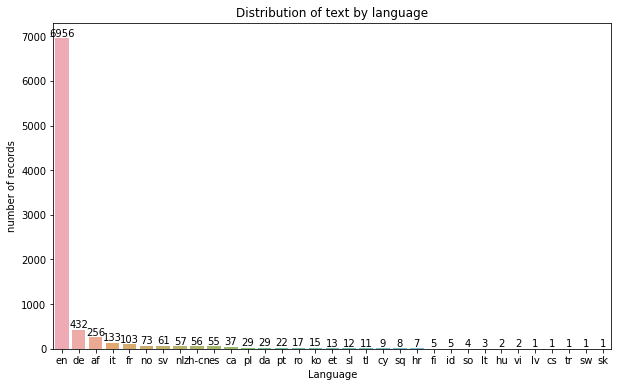

In [25]:
x = dataset1["Language"].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

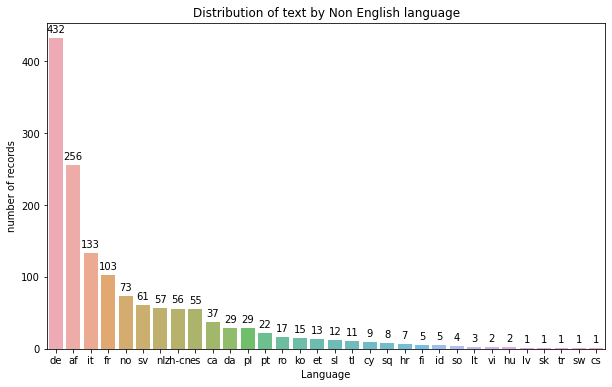

In [26]:
dataset1_nonEnglish = pd.DataFrame(dataset1[dataset1["Language"]!='en'])

x = dataset1_nonEnglish["Language"].value_counts()
x=x.sort_values(ascending=False)
plt.figure(figsize=(10,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Distribution of text by Non English language")
plt.ylabel('number of records')
plt.xlabel('Language')
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show();

In [27]:
dataset1['Language'].value_counts()

en       6956
de        432
af        256
it        133
fr        103
no         73
sv         61
nl         57
zh-cn      56
es         55
ca         37
pl         29
da         29
pt         22
ro         17
ko         15
et         13
sl         12
tl         11
cy          9
sq          8
hr          7
fi          5
id          5
so          4
lt          3
hu          2
vi          2
cs          1
tr          1
sw          1
lv          1
sk          1
Name: Language, dtype: int64

In [28]:
email_regex = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'

In [29]:
def fn_remove_irrelaventWords(df,columnName):
  for index in range(df.shape[0]):
    df[columnName][index] = df[columnName][index].lower()                                       # to lower case 
    df[columnName][index] = re.sub(email_regex,"",df.loc[index,columnName])                     # remove email address
    df[columnName][index] = re.sub(r'\S*@\S*\s?', '', df.loc[index,columnName])                 # remove email address with appended text
    df[columnName][index] = re.sub(r"received from:",' ',df.loc[index,columnName])              # remove unwanted text
    df[columnName][index] = re.sub(r"from:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"to:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"subject:",' ',df.loc[index,columnName])                    # remove unwanted text  
    df[columnName][index] = re.sub(r"sent:",' ',df.loc[index,columnName])                       # remove unwanted text
    df[columnName][index] = re.sub(r"ic:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"cc:",' ',df.loc[index,columnName])                         # remove unwanted text
    df[columnName][index] = re.sub(r"bcc:",' ',df.loc[index,columnName])                        # remove unwanted text  
    df[columnName][index] = re.sub(r'\d+','' ,df.loc[index,columnName])                         # remove numbers
    df[columnName][index] = re.sub(r'\n',' ',df.loc[index,columnName])                          # remove new line character
    df[columnName][index] = re.sub(r'#','', df.loc[index,columnName])                           # remove hashtag while keeping hashtag text
    df[columnName][index] = re.sub(r'&;?', 'and',df.loc[index,columnName])                      # remove &
    df[columnName][index] = re.sub(r'\&\w*;', '', df.loc[index,columnName])                     # remove HTML special entities (e.g. &amp;)
    df[columnName][index] = re.sub(r'https?:\/\/.*\/\w*', '', df.loc[index,columnName])         # remove hyperlinks
    df[columnName][index] = re.sub(r"hello",' ',df.loc[index,columnName])                       # remove 'hello' word
    df[columnName][index] = re.sub(r"_",' ',df.loc[index,columnName])                           # remove _
    df[columnName][index] = re.sub(r"-",' ',df.loc[index,columnName])                           # remove -
    df[columnName][index] = re.sub(r",",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"\(",' ',df.loc[index,columnName])
    df[columnName][index] = re.sub(r"\)",' ',df.loc[index,columnName])
  return df

In [30]:
df_clean = dataset1.reset_index()

In [31]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              8417 non-null   int64 
 1   Short description  8417 non-null   object
 2   Description        8417 non-null   object
 3   Caller             8417 non-null   object
 4   Assignment group   8417 non-null   object
 5   Language           8417 non-null   object
dtypes: int64(1), object(5)
memory usage: 394.7+ KB


In [32]:
df_clean = fn_remove_irrelaventWords(df_clean,'Description')
df_clean = fn_remove_irrelaventWords(df_clean,'Short description')

In [33]:
df_clean.tail(20)

index                                  Short description  \
8397   8480                      customer group enhanced field   
8398   8481                                         ess portal   
8399   8482                        robot hostname  is inactive   
8400   8483             fw: case id [ref: case :ref] :: others   
8401   8484  please remove user hugcadrn ixhlwdgt  ralfteim...   
8402   8485     ticket update on inc to user hbmwlprq ilfvyodx   
8403   8486                         ticket update on ticket no   
8404   8487              telephony software is missing from pc   
8405   8488                                 erp account unlock   
8406   8489                                     account locked   
8407   8490                         check status in purchasing   
8408   8491                                     vpn for laptop   
8409   8492                 hr tool etime option not visitble    
8410   8493             erp fi    ob  two accounts to be added   
8411   8494  tablet needs reimaged due to multiple issues w...   
8412   8495                  emails not coming in from zz mail   
8413   8496                           telephony software issue   
8414   8497  vip: windows password reset for tifpdchb pedxruyf   
8415   8498                       machine não está funcionando   
8416   8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
8397            a business decision has recently bee...  nlearzwi ukdzstwi   
8398        hi team   i was going into the ess file ...  eagvusbr nguqityl   
8399                        robot hostname  is inactive  rkupnshb gsmzfojw   
8400    pacvbetl yptglhoe    thursday  august    : p...  pacvbetl yptglhoe   
8401  please remove user hugcadrn ixhlwdgt  ralfteim...  hugcadrn ixhlwdgt   
8402     ticket update on inc to user hbmwlprq ilfvyodx  fumkcsji sarmtlhy   
8403                         ticket update on ticket no  fumkcsji sarmtlhy   
8404  pc received multiple windows security updates ...  pvbomqht smfkuhwi   
8405  name:mfeyouli ndobtzpw language: browser:micro...  rbozivdq gmlhrtvp   
8406                                     account locked  sdvlxbfe ptnahjkw   
8407  please contact ed pasgryowski  pasgryo  about ...  mpihysnw wrctgoan   
8408        i need a vpn for my new laptop. name llv...  jxgobwrm qkugdipo   
8409                 hr tool etime option not visitble   tmopbken ibzougsd   
8410  i am sorry  i have another two accounts that n...  ipwjorsc uboapexr   
8411  tablet needs reimaged due to multiple issues w...  cpmaidhj elbaqmtp   
8412        good afternoon  i am not receiving the e...  avglmrts vhqmtiua   
8413                           telephony software issue  rbozivdq gmlhrtvp   
8414  vip: windows password reset for tifpdchb pedxruyf  oybwdsgx oxyhwrfz   
8415  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8416  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group Language  
8397            GRP_9       en  
8398            GRP_9       en  
8399            GRP_8       en  
8400            GRP_0       en  
8401            GRP_2       en  
8402            GRP_0       en  
8403            GRP_0       sv  
8404            GRP_3       en  
8405            GRP_0       en  
8406            GRP_0       en  
8407           GRP_29       en  
8408           GRP_34       en  
8409            GRP_0       en  
8410           GRP_10       en  
8411            GRP_3       en  
8412           GRP_29       en  
8413            GRP_0       en  
8414            GRP_0       en  
8415           GRP_62       en  
8416           GRP_49       de

In [34]:
df_clean = df_clean.drop(columns=['index'],axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
 4   Language           8417 non-null   object
dtypes: object(5)
memory usage: 328.9+ KB


In [35]:
def fn_removeCaller(df,columnName):
  for index in range(df.shape[0]):
    if (df['Caller'][index] in df[columnName][index]):
      df[columnName][index] = df[columnName][index].replace(df['Caller'][index],"person")
    if (df['Caller'][index].replace(" ","") in df[columnName][index]):
      df[columnName][index] = df[columnName][index].replace(df['Caller'][index].replace(" ",""),"person")
  return df

In [36]:
df_clean = fn_removeCaller(df_clean,'Description')
df_clean = fn_removeCaller(df_clean,'Short description')

In [37]:
df_clean.tail(10)

Short description  \
8407                         check status in purchasing   
8408                                     vpn for laptop   
8409                 hr tool etime option not visitble    
8410             erp fi    ob  two accounts to be added   
8411  tablet needs reimaged due to multiple issues w...   
8412                  emails not coming in from zz mail   
8413                           telephony software issue   
8414  vip: windows password reset for tifpdchb pedxruyf   
8415                       machine não está funcionando   
8416  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
8407  please contact ed pasgryowski  pasgryo  about ...  mpihysnw wrctgoan   
8408        i need a vpn for my new laptop. name llv...  jxgobwrm qkugdipo   
8409                 hr tool etime option not visitble   tmopbken ibzougsd   
8410  i am sorry  i have another two accounts that n...  ipwjorsc uboapexr   
8411  tablet needs reimaged due to multiple issues w...  cpmaidhj elbaqmtp   
8412        good afternoon  i am not receiving the e...  avglmrts vhqmtiua   
8413                           telephony software issue  rbozivdq gmlhrtvp   
8414  vip: windows password reset for tifpdchb pedxruyf  oybwdsgx oxyhwrfz   
8415  i am unable to access the machine utilities to...  ufawcgob aowhxjky   
8416  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group Language  
8407           GRP_29       en  
8408           GRP_34       en  
8409            GRP_0       en  
8410           GRP_10       en  
8411            GRP_3       en  
8412           GRP_29       en  
8413            GRP_0       en  
8414            GRP_0       en  
8415           GRP_62       en  
8416           GRP_49       de

In [38]:
df_clean.to_excel("df_clean_LangDetected.xlsx")


Using the GoSlate Library, we have Translated all the languages to English and verified it using Google Translator

Directly importing the Translated dataset

In [ ]:
# svc_domains = ['.com','.com.au','.com.ar','.co.kr','.co.in','.co.jp','.at','.de','.ru','.ch','.fr','.es','.ae']
# svc_urls = ['http://translate.google' + domain for domain in svc_domains]

In [ ]:
# gs = Goslate(service_urls=svc_urls)
# trans_8416 = gs.translate(df_clean['Description'][8416], target_language='en', source_language='auto')

In [ ]:
# print ('Original Text : ',df_clean['Description'][8416])
# print('Traslated to English : ',trans_8416)

Original Text :  an mehreren pc`s lassen sich verschiedene prgramdntyme nicht öffnen. bereich cnc.
Traslated to English :  Several prgramdntyme can not be opened on several PCs. Area CNC.


In [ ]:
# def fn_ConvertToEnglish(df,columnName):
#  for idx in range(df.shape[0]):
#    row_iter = gs.translate(df[columnName][idx],target_language='en',source_language = 'auto')
#    df[columnName][idx] = str(row_iter)
#  return df

In [ ]:
# df_lang = fn_ConvertToEnglish(df_clean,'Description')
# df_lang = fn_ConvertToEnglish(df_clean,'Short description')

In [ ]:
#df_lang.to_excel("df_clean_LangDetected_Translated.xlsx")

In [42]:
df_lang = pd.read_excel("/content/sample_data/df_clean_LangDetected_Translated.xlsx")

In [43]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         8417 non-null   int64 
 1   Short description  8417 non-null   object
 2   Description        8417 non-null   object
 3   Caller             8417 non-null   object
 4   Assignment group   8417 non-null   object
 5   Language           8417 non-null   object
dtypes: int64(1), object(5)
memory usage: 394.7+ KB


In [44]:
df_lang = df_lang.drop(columns=['Unnamed: 0'],axis=1)

In [45]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8417 non-null   object
 1   Description        8417 non-null   object
 2   Caller             8417 non-null   object
 3   Assignment group   8417 non-null   object
 4   Language           8417 non-null   object
dtypes: object(5)
memory usage: 328.9+ KB


In [46]:
df_lang[pd.isnull(df_lang).any(axis=1)]

Empty DataFrame
Columns: [Short description, Description, Caller, Assignment group, Language]
Index: []

In [47]:
df_lang.fillna(str(), inplace=True)
df_lang.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
Language             0
dtype: int64

In [55]:
df_lang.insert(loc=4, 
              column='combined_description', 
              allow_duplicates=True, 
              value=list(df_lang['Short description'].str.strip() + ' ' + df_lang['Description'].str.strip()))

In [56]:
df_lang.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     8417 non-null   object
 1   Description           8417 non-null   object
 2   Caller                8417 non-null   object
 3   Assignment group      8417 non-null   object
 4   combined_description  8417 non-null   object
 5   Language              8417 non-null   object
dtypes: object(6)
memory usage: 394.7+ KB


In [57]:
df_lang.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                         Description             Caller  \
0  verified user details. employee and manager na...  spxjnwir pjlcoqds   
1  team my meetings/skype meetings etc are not ap...  hmjdrvpb komuaywn   
2                     hi i cannot log on to vpn best  eylqgodm ybqkwiam   
3                      unable to access hr tool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group                               combined_description Language  
0            GRP_0  login issue verified user details. employee an...       en  
1            GRP_0  outlook team my meetings/skype meetings etc ar...       en  
2            GRP_0  cant log in to vpn hi i cannot log on to vpn best       en  
3            GRP_0  unable to access hr tool page unable to access...       en  
4            GRP_0                            skype error skype error       no

In [58]:
def fn_remove_irrelaventWords_LevelTwo(df,columnName):
  for index in range(df.shape[0]):
    df[columnName][index] = df[columnName][index].lower()                                       # to lower case 
    df[columnName][index] = df[columnName][index].replace("// ::",' ')
    df[columnName][index] = df[columnName][index].replace("<",' ')
    df[columnName][index] = df[columnName][index].replace(">",' ')
    df[columnName][index] = df[columnName][index].replace(";",' ')
    df[columnName][index] = df[columnName][index].replace(".",' ')
    df[columnName][index] = df[columnName][index].replace("•",' ')
    df[columnName][index] = df[columnName][index].replace("?",' ')
    df[columnName][index] = df[columnName][index].replace("\\",' ')
    df[columnName][index] = df[columnName][index].replace("\/",' ')
    df[columnName][index] = df[columnName][index].replace(":",' ',)
    df[columnName][index] = df[columnName][index].replace("%",' ',)
    df[columnName][index] = df[columnName][index].replace("=",' ',)
    df[columnName][index] = df[columnName][index].replace("[mail ]",' ')
    df[columnName][index] = df[columnName][index].replace("[",' ')
    df[columnName][index] = df[columnName][index].replace("]",' ')
    df[columnName][index] = df[columnName][index].replace("< mail >",' ')
    df[columnName][index] = df[columnName][index].replace("+",' ')
    df[columnName][index] = df[columnName][index].replace("\"",' ')
    df[columnName][index] = df[columnName][index].replace("' ",' ')
    df[columnName][index] = df[columnName][index].replace(" '",' ')
    df[columnName][index] = df[columnName][index].replace("* * * ",' ')
    df[columnName][index] = df[columnName][index].replace(" * * *",' ')
    df[columnName][index] = df[columnName][index].replace("* ",' ')
    df[columnName][index] = df[columnName][index].replace(" *",' ')
    df[columnName][index] = df[columnName][index].replace("/ ",' ')
    df[columnName][index] = df[columnName][index].replace("撤回 ",' ')
    df[columnName][index] = df[columnName][index].replace("答复 ",' ')
    df[columnName][index] = df[columnName][index].replace("*",' ')
    df[columnName][index] = df[columnName][index].replace("/",' ')
  return df

In [59]:
df_lang_clean = fn_remove_irrelaventWords_LevelTwo(df_lang,"combined_description")

In [60]:
df_lang_clean.head(20)

Short description  \
0                                         login issue   
1                                             outlook   
2                                  cant log in to vpn   
3                       unable to access hr tool page   
4                                         skype error   
5      unable to log in to engineering tool and skype   
6   event: critical:hostname .company.com the valu...   
7   ticket no employment status new non employee [...   
8                unable to disable add ins on outlook   
9                            ticket update on inplant   
10  engineering tool says not connected and unable...   
11            hr tool site not loading page correctly   
12  unable to login to hr tool to sgxqsuojr xwbeso...   
13                   user wants to reset the password   
14                            unable to open payslips   
15                           ticket update on inplant   
16                     unable to login to company vpn   
17        when undocking pc screen will not come back   
18                             erp sid account locked   
19                            unable to sign into vpn   

                                          Description             Caller  \
0   verified user details. employee and manager na...  spxjnwir pjlcoqds   
1   team my meetings/skype meetings etc are not ap...  hmjdrvpb komuaywn   
2                      hi i cannot log on to vpn best  eylqgodm ybqkwiam   
3                       unable to access hr tool page  xbkucsvz gcpydteq   
4                                         skype error  owlgqjme qhcozdfx   
5      unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6   event: critical:hostname .company.com the valu...  jyoqwxhz clhxsoqy   
7   ticket no employment status new non employee [...  eqzibjhw ymebpoih   
8                unable to disable add ins on outlook  mdbegvct dbvichlg   
9                            ticket update on inplant  fumkcsji sarmtlhy   
10  engineering tool says not connected and unable...  badgknqs xwelumfz   
11            hr tool site not loading page correctly  dcqsolkx kmsijcuz   
12  unable to login to hr tool to sgxqsuojr xwbeso...  oblekmrw qltgvspb   
13                   user wants to reset the password  iftldbmu fujslwby   
14                            unable to open payslips  epwyvjsz najukwho   
15                           ticket update on inplant  fumkcsji sarmtlhy   
16  hi i am unable to login to company vpn website...  chobktqj qdamxfuc   
17        when undocking pc screen will not come back  sigfdwcj reofwzlm   
18                             erp sid account locked  nqdyowsm yqerwtna   
19                            unable to sign into vpn  ftsqkvre bqzrupic   

   Assignment group                               combined_description  \
0             GRP_0  login issue verified user details  employee an...   
1             GRP_0  outlook team my meetings skype meetings etc ar...   
2             GRP_0  cant log in to vpn hi i cannot log on to vpn best   
3             GRP_0  unable to access hr tool page unable to access...   
4             GRP_0                            skype error skype error   
5             GRP_0  unable to log in to engineering tool and skype...   
6             GRP_1  event  critical hostname  company com the valu...   
7             GRP_0  ticket no employment status new non employee  ...   
8             GRP_0  unable to disable add ins on outlook unable to...   
9             GRP_0  ticket update on inplant ticket update on inplant   
10            GRP_0  engineering tool says not connected and unable...   
11            GRP_0  hr tool site not loading page correctly hr too...   
12            GRP_0  unable to login to hr tool to sgxqsuojr xwbeso...   
13            GRP_0  user wants to reset the password user wants to...   
14            GRP_0    unable to open payslips unable to open payslips   
15            GRP_0  ticket update on inplant ticket upda

In [61]:
df_lang_clean.to_excel("df_Moji_langDet_Translated_clean_combinedDesc.xlsx")

**Deterministic Rules**

In [62]:
def deterministicRules(df,columnName):
  for i in range(df.shape[0]):
      #1 Contains telephony_software > GRP_7
    if pd.notna(df[columnName][i]):
      if ('telephony software' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_7'
      #2 contains cutview >  GRP_66
      elif ('cutview' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_66'
      #3 contains engg application >  GRP_58
      elif ('engg application' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_58'
      #4 contains ethics >  GRP_23
      elif ('ethics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_23'
      # contains crm dynamics >  GRP_22
      elif ('crm dynamics' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_22'
      # contains distributor tool & company center >  GRP_21
      elif ('distributor tool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      elif ('company center' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_21'
      # contains bpctwhsn kzqsbmtp & network outage or circuit outage >  GRP_8
      elif ((df['Caller'][i] == 'bpctwhsn kzqsbmtp' and ('network outage' in df[columnName][i]) or 'circuit outage' in df[columnName][i])):
        df['pred_group'][i] = 'GRP_8'
      elif ('reset passwords' in df[columnName][i] and 'the' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_17'
      elif (df[columnName][i].startswith('erp access issue')):
        df['pred_group'][i] = 'GRP_2'
      elif ('vsphere' in df[columnName][i] or 'esxi' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_12'
      elif ('windows account' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid account lock' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('erp sid password reset' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif(df['Caller'][i] == 'jionmpsf wnkpzcmv' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_24'
      elif(df['Caller'][i] == 'cwrikael oanmsecr' and 'eutool' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_0'
      elif ('sso portal' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_73'
      elif ('unable complete forecast' in df[columnName][i]):
        df['pred_group'][i] = 'GRP_67'
      elif (df[columnName][i].startswith('timecard') or df[columnName][i].startswith('time card')):
        df['pred_group'][i] = 'GRP_36'

In [63]:
df_lang_clean.insert(loc=5,column='pred_group',value=np.nan,allow_duplicates=True)

In [64]:
df_lang_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8417 entries, 0 to 8416
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     8417 non-null   object 
 1   Description           8417 non-null   object 
 2   Caller                8417 non-null   object 
 3   Assignment group      8417 non-null   object 
 4   combined_description  8417 non-null   object 
 5   pred_group            0 non-null      float64
 6   Language              8417 non-null   object 
dtypes: float64(1), object(6)
memory usage: 460.4+ KB


In [65]:
deterministicRules(df_lang_clean,"combined_description")
df_determinted = df_lang_clean[~df_lang_clean['pred_group'].isna()]

In [66]:
df_determinted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 18 to 8413
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     557 non-null    object
 1   Description           557 non-null    object
 2   Caller                557 non-null    object
 3   Assignment group      557 non-null    object
 4   combined_description  557 non-null    object
 5   pred_group            557 non-null    object
 6   Language              557 non-null    object
dtypes: object(7)
memory usage: 34.8+ KB


In [67]:
df_determinted.head()

Short description  \
18                              erp sid account locked   
25                              erp sid password reset   
49        status does not change on telephony software   
80                              erp sid account locked   
154  reset passwords for person using password mana...   

                                           Description             Caller  \
18                              erp sid account locked  nqdyowsm yqerwtna   
25                              erp sid password reset  jqhtkfsm xoehtbnl   
49   when closing a call the agent keeps on the "on...  aofnvyzt eqiyskhm   
80                              erp sid account locked  ilvortuq zfgrlewm   
154  employee is getting an error "user authenticat...  hckvpary emxbpkwy   

    Assignment group                               combined_description  \
18             GRP_0      erp sid account locked erp sid account locked   
25             GRP_0      erp sid password reset erp sid password reset   
49             GRP_7  status does not change on telephony software w...   
80             GRP_0      erp sid account locked erp sid account locked   
154           GRP_17  reset passwords for person using password mana...   

    pred_group Language  
18       GRP_0       en  
25       GRP_0       af  
49       GRP_7       en  
80       GRP_0       en  
154     GRP_17       en

In [68]:
df_NonDet = df_lang_clean[df_lang_clean['pred_group'].isna()]

In [69]:
df_NonDet = df_NonDet.reset_index()
df_NonDet = df_NonDet.drop(columns=['index'],axis=1)
df_NonDet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   combined_description  7860 non-null   object
 5   pred_group            0 non-null      object
 6   Language              7860 non-null   object
dtypes: object(7)
memory usage: 430.0+ KB


We have Group till GRP_72. Now assigning GRP_99 to all merged groups having count <=10



In [75]:
df_NonDet.insert(loc=4,column='New Assignment Group',value=np.nan,allow_duplicates=True)

In [76]:
groupsToBeMerged = pd.DataFrame(df_NonDet['Assignment group'].value_counts() <=10)
groupsToBeMerged = groupsToBeMerged[groupsToBeMerged['Assignment group'] == True]
groupsToBeMergedList = list(groupsToBeMerged.index)
groupsToBeMergedList

['GRP_52',
 'GRP_51',
 'GRP_55',
 'GRP_65',
 'GRP_59',
 'GRP_49',
 'GRP_46',
 'GRP_43',
 'GRP_32',
 'GRP_68',
 'GRP_63',
 'GRP_56',
 'GRP_38',
 'GRP_69',
 'GRP_54',
 'GRP_57',
 'GRP_71',
 'GRP_72',
 'GRP_23',
 'GRP_70',
 'GRP_67',
 'GRP_58',
 'GRP_61',
 'GRP_66',
 'GRP_64',
 'GRP_35']

In [77]:
len(groupsToBeMergedList)

26

In [78]:
df_NonDet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     7860 non-null   object 
 1   Description           7860 non-null   object 
 2   Caller                7860 non-null   object 
 3   Assignment group      7860 non-null   object 
 4   New Assignment Group  0 non-null      float64
 5   combined_description  7860 non-null   object 
 6   pred_group            0 non-null      object 
 7   Language              7860 non-null   object 
dtypes: float64(1), object(7)
memory usage: 491.4+ KB


In [79]:
for index in range(df_NonDet.shape[0]):
  if (df_NonDet['Assignment group'][index] in groupsToBeMergedList):
    df_NonDet['New Assignment Group'][index] = 'GRP_99'
  else:
    df_NonDet['New Assignment Group'][index] = df_NonDet['Assignment group'][index]

In [80]:
df_NonDet.tail(30)

Short description  \
7830  hi it help team please unblock my new company ...   
7831  can you unblock my account so i can use outloo...   
7832  plant value added services one day pick route ...   
7833               The computer can't open the computer   
7834                                      ticket update   
7835              outlook freezing because of crm addin   
7836              inquiry about employee shesyhur posrt   
7837                etime time card update information.   
7838  supply chain software account unlock and passw...   
7839     can't login to bex analyzer through vpn urgent   
7840                        beenefits access on oneteam   
7841                      unable to connect to hostname   
7842                      customer group enhanced field   
7843                                         Ess portal   
7844                         robot hostname is inactive   
7845             fw: case id [ref: case :ref] :: others   
7846  please remove user person ralfteimp from palo ...   
7847     ticket update on inc to user hbmwlprq ilfvyodx   
7848                         ticket update on ticket no   
7849                                 erp account unlock   
7850                                     account locked   
7851                         check status in purchasing   
7852                                     vpn for laptop   
7853                  hr tool etime option not visitble   
7854                 erp fi ob two accounts to be added   
7855  tablet needs reimaged due to multiple issues w...   
7856                  emails not coming in from zz mail   
7857  vip: windows password reset for tifpdchb pedxruyf   
7858                             Machine is not working   
7859  Several prgramdntyme can not be opened on seve...   

                                            Description             Caller  \
7830  Person Friday August: At NWFODMHC ExurcWKM WG:...  ntydihzo aeptfbgs   
7831  nwfodmhc exurcwkm friday august : am prishry b...  eqzibjhw ymebpoih   
7832  request to phase in additional vas customers. ...  xnqzhtwu hivumtfz   
7833              TO Xiaohe morning computer can't open  xqyjztnm onfusvlz   
7834  rakthyesh ramdntythanjesh friday august : am u...  eqzibjhw ymebpoih   
7835              outlook freezing because of crm addin  crjhotyk pxslorbe   
7836              inquiry about employee shesyhur posrt  pvlxjizg xzvlwqjc   
7837                etime time card update information.  tmopbken ibzougsd   
7838  supply chain software account unlock and passw...  xjyuobma pzgqixlj   
7839                                               best  cfzsajbe lyejkdho   
7840  yesterday it helped me access some additional ...  bjitvswa yrmugfnq   
7841  stehdgty jfhying called in for an issue where ...  byfskuni mhvnqodk   
7842  a business decision has recently been made to ...  nlearzwi ukdzstwi   
7843  hi team i was going into the ess file and chec...  eagvusbr nguqityl   
7844                         robot hostname is inactive  rkupnshb gsmzfojw   
7845  person thursday august : pm nwfodmhc exurcwkm ...  pacvbetl yptglhoe   
7846  please remove user person ralfteimp from palo ...  hugcadrn ixhlwdgt   
7847     ticket update on inc to user hbmwlprq ilfvyodx  fumkcsji sarmtlhy   
7848                         ticket update on ticket no  fumkcsji sarmtlhy   
7849  name:mfeyouli ndobtzpw language: browser:micro...  rbozivdq gmlhrtvp   
7850                                     account locked  sdvlxbfe ptnahjkw   
7851  please contact ed pasgryowski pasgryo about hi...  mpihysnw wrctgoan   
7852  i need a vpn for my new laptop. name llv kneth...  jxgobwrm qkugdipo   
7853                  hr tool etime option not visitble  tmopbken ibzougsd   
7854  i am sorry i have another two accounts that ne...  ipwjorsc uboapexr   
7855  tablet needs reimaged due to multiple issues w...  cpmaidhj elbaqmtp   
7856  good afternoon i am not receiving the emails t...  avglmrts vhqmtiua   
7857  vip: windows passw

In [81]:
df_NonDet['New Assignment Group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_8',
       'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_18', 'GRP_19', 'GRP_2', 'GRP_20',
       'GRP_21', 'GRP_22', 'GRP_24', 'GRP_25', 'GRP_26', 'GRP_27',
       'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31', 'GRP_17', 'GRP_33',
       'GRP_34', 'GRP_99', 'GRP_36', 'GRP_37', 'GRP_39', 'GRP_40',
       'GRP_41', 'GRP_42', 'GRP_7', 'GRP_44', 'GRP_45', 'GRP_47',
       'GRP_48', 'GRP_50', 'GRP_53', 'GRP_60', 'GRP_62'], dtype=object)

In [82]:
df_NonDet['New Assignment Group'].value_counts()

GRP_0     3660
GRP_8      591
GRP_24     285
GRP_9      252
GRP_12     251
GRP_19     213
GRP_2      209
GRP_3      197
GRP_6      182
GRP_13     143
GRP_10     139
GRP_5      128
GRP_14     116
GRP_25     115
GRP_33     103
GRP_29      97
GRP_4       95
GRP_18      88
GRP_99      88
GRP_16      84
GRP_31      67
GRP_34      62
GRP_26      55
GRP_28      44
GRP_41      40
GRP_40      40
GRP_30      39
GRP_42      37
GRP_15      36
GRP_45      35
GRP_20      33
GRP_1       31
GRP_11      30
GRP_22      27
GRP_47      27
GRP_48      25
GRP_62      25
GRP_7       21
GRP_17      19
GRP_39      19
GRP_27      17
GRP_60      16
GRP_37      15
GRP_44      15
GRP_50      14
GRP_21      13
GRP_53      11
GRP_36      11
Name: New Assignment Group, dtype: int64

In [83]:
df_ML = df_NonDet.copy() # Creating copy 
df_DL = df_NonDet.copy()

In [84]:
df_ML.shape, df_DL.shape

((7860, 8), (7860, 8))

In [85]:
df_DL.to_excel("df_DL.xlsx")

Processing Data for ML Model

In [86]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [87]:
stopwords = set(stopwords.words('english'))
 # Remove stopwords
df_ML['combined_description'] = df_ML['combined_description'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))

In [88]:
df_ML.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                         Description             Caller  \
0  verified user details. employee and manager na...  spxjnwir pjlcoqds   
1  team my meetings/skype meetings etc are not ap...  hmjdrvpb komuaywn   
2                     hi i cannot log on to vpn best  eylqgodm ybqkwiam   
3                      unable to access hr tool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group New Assignment Group  \
0            GRP_0                GRP_0   
1            GRP_0                GRP_0   
2            GRP_0                GRP_0   
3            GRP_0                GRP_0   
4            GRP_0                GRP_0   

                                combined_description pred_group Language  
0  login issue verified user details employee man...        NaN       en  
1  outlook team meetings skype meetings etc appea...        NaN       en  
2                cant log vpn hi cannot log vpn best        NaN       en  
3  unable access hr tool page unable access hr to...        NaN       en  
4                            skype error skype error        NaN       no

In [89]:
#lemmatization
# Initialize spacy 'en' medium model, keeping only tagger component needed for lemmatization
nlp = spacy.load('en', disable=['parser', 'ner'])

# Define a function to lemmatize the descriptions
def lemmatizer(sentence):
    # Parse the sentence using the loaded 'en' model object `nlp`
    doc = nlp(sentence)
    return " ".join([token.lemma_ for token in doc if token.lemma_ !='-PRON-'])

In [90]:
df_ML['combined_description'] = df_ML['combined_description'].apply(lemmatizer)

In [91]:
df_ML.head(10)

Short description  \
0                                        login issue   
1                                            outlook   
2                                 cant log in to vpn   
3                      unable to access hr tool page   
4                                        skype error   
5     unable to log in to engineering tool and skype   
6  event: critical:hostname .company.com the valu...   
7  ticket no employment status new non employee [...   
8               unable to disable add ins on outlook   
9                           ticket update on inplant   

                                         Description             Caller  \
0  verified user details. employee and manager na...  spxjnwir pjlcoqds   
1  team my meetings/skype meetings etc are not ap...  hmjdrvpb komuaywn   
2                     hi i cannot log on to vpn best  eylqgodm ybqkwiam   
3                      unable to access hr tool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   
5     unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
6  event: critical:hostname .company.com the valu...  jyoqwxhz clhxsoqy   
7  ticket no employment status new non employee [...  eqzibjhw ymebpoih   
8               unable to disable add ins on outlook  mdbegvct dbvichlg   
9                           ticket update on inplant  fumkcsji sarmtlhy   

  Assignment group New Assignment Group  \
0            GRP_0                GRP_0   
1            GRP_0                GRP_0   
2            GRP_0                GRP_0   
3            GRP_0                GRP_0   
4            GRP_0                GRP_0   
5            GRP_0                GRP_0   
6            GRP_1                GRP_1   
7            GRP_0                GRP_0   
8            GRP_0                GRP_0   
9            GRP_0                GRP_0   

                                combined_description pred_group Language  
0  login issue verify user detail employee manage...        NaN       en  
1  outlook team meeting skype meeting etc appear ...        NaN       en  
2            can not log vpn hi can not log vpn best        NaN       en  
3  unable access hr tool page unable access hr to...        NaN       en  
4                            skype error skype error        NaN       no  
5  unable log engineering tool skype unable log e...        NaN       en  
6  event critical hostname company com value moun...        NaN       en  
7  ticket employment status new non employee ente...        NaN       en  
8  unable disable add ins outlook unable disable ...        NaN       en  
9        ticket update inplant ticket update inplant        NaN       en

In [92]:
df_ML.to_excel("df_ML_StopWords_Lemmatized.xlsx")

Data Visualization

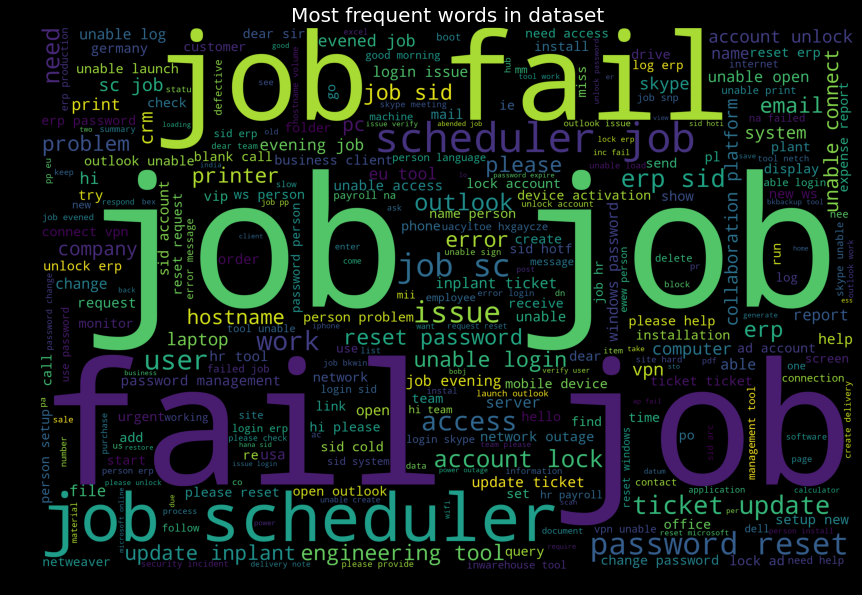

In [ ]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(df_ML.combined_description))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [ ]:
#ngram function
def ngram_extractor(text, n_gram):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# Function to generate a dataframe with n_gram and top max_row frequencies
def generate_ngrams(df, n_gram, max_row):
    temp_dict = defaultdict(int)
    for question in df:
        for word in ngram_extractor(question, n_gram):
            temp_dict[word] += 1
    temp_df = pd.DataFrame(sorted(temp_dict.items(), key=lambda x: x[1])[::-1]).head(max_row)
    temp_df.columns = ["word", "wordcount"]
    return temp_df

In [ ]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   New Assignment Group  7860 non-null   object
 5   combined_description  7860 non-null   object
 6   pred_group            0 non-null      object
 7   Language              7860 non-null   object
dtypes: object(8)
memory usage: 491.4+ KB


In [ ]:
Ticket_desc = df_ML['combined_description']
#Define empty list
ticket_desc_cleaned = []
res = []
#Define for loop to iterate through the elements of the ticket_desc
for l in Ticket_desc:
    #Parse the contents of the cell
    soup = BeautifulSoup(l, 'html.parser')
    #Find all instances of the text within the </p> tag
    for el in soup.find_all('p'):
        res.append(el.get_text())
    #concatenate the strings from the list    
    endstring = ' '.join(map(str, res))
    #reset list
    res = []
    #Append the concatenated string to the main list
    ticket_desc_cleaned.append(endstring)

In [ ]:
ticket_desc_na_cleaned = [item.lower() for item in Ticket_desc]
#remove html links from list 
ticket_desc_na_cleaned =  [re.sub(r"http\S+", "", item) for item in ticket_desc_na_cleaned]
#remove special characters left
ticket_desc_na_cleaned = [re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", item) for item in ticket_desc_na_cleaned]

#convert to dataframe and rename the column of the ticket_desc_na_cleaned list
ticket_desc_clean = pd.DataFrame(np.array(ticket_desc_na_cleaned).reshape(-1))
ticket_desc_clean.columns = ["ans"]
#Squeeze dataframe to obtain series
desc_cleaned = ticket_desc_clean.squeeze()

In [ ]:
#generate unigram
ans_unigram = generate_ngrams(desc_cleaned, 1, 30)

In [ ]:
ans_unigram.head()

word  wordcount
0        job       4987
1     please       2211
2   password       2209
3  scheduler       1888
4        erp       1796

In [ ]:
ans_unigram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   word       30 non-null     object
 1   wordcount  30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


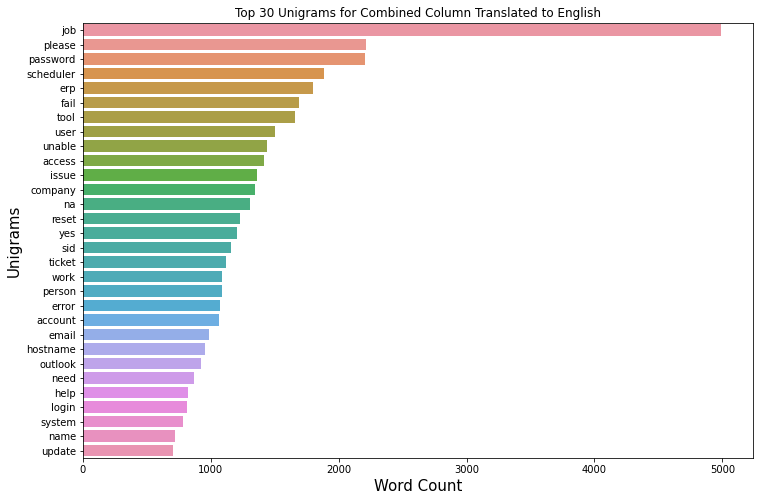

In [ ]:
#generate barplot for unigram
plt.figure(figsize=(12,8))
sns.barplot(ans_unigram["wordcount"],ans_unigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Unigrams", fontsize=15)
plt.title("Top 30 Unigrams for Combined Column Translated to English")
plt.show()

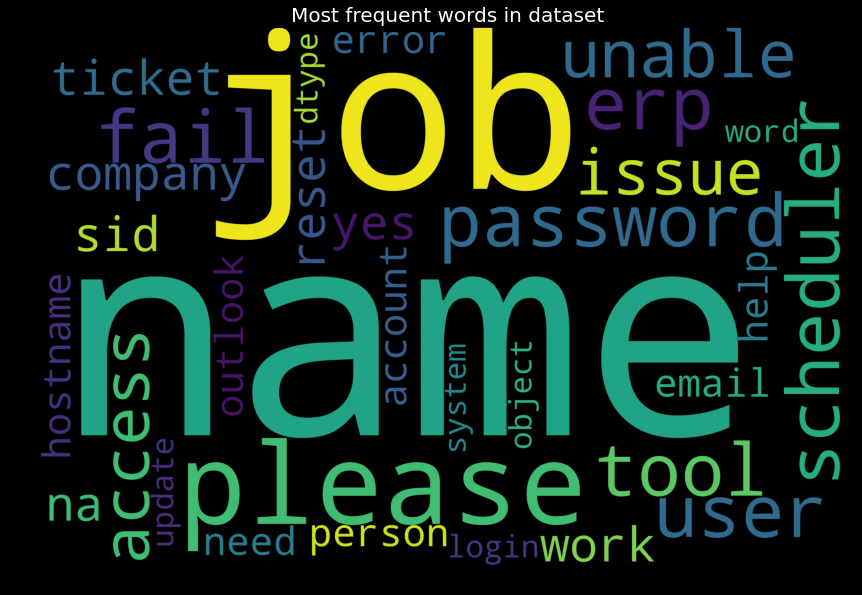

In [ ]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
#wc_word=wc.generate(str(ans_unigram))
wc_word=wc.generate(str(ans_unigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [ ]:
#generate bigram
ans_bigram = generate_ngrams(desc_cleaned, 2, 20)

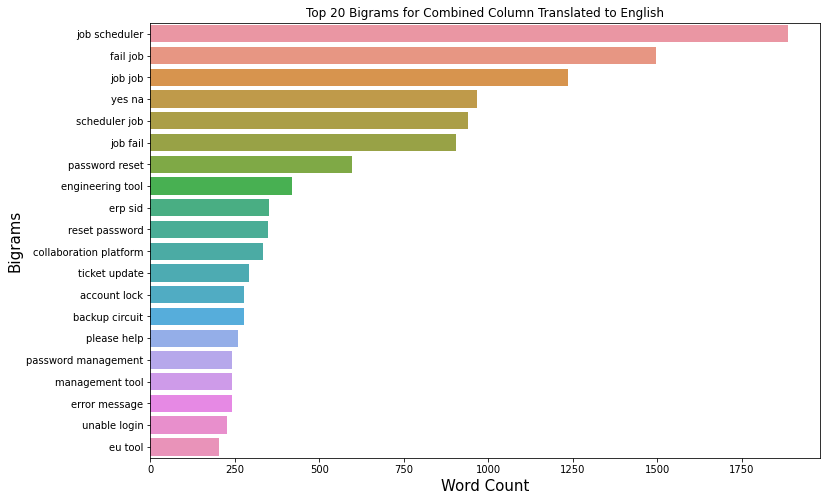

In [ ]:
#generate barplot for bigram
plt.figure(figsize=(12,8))
sns.barplot(ans_bigram["wordcount"],ans_bigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Bigrams", fontsize=15)
plt.title("Top 20 Bigrams for Combined Column Translated to English")
plt.show()

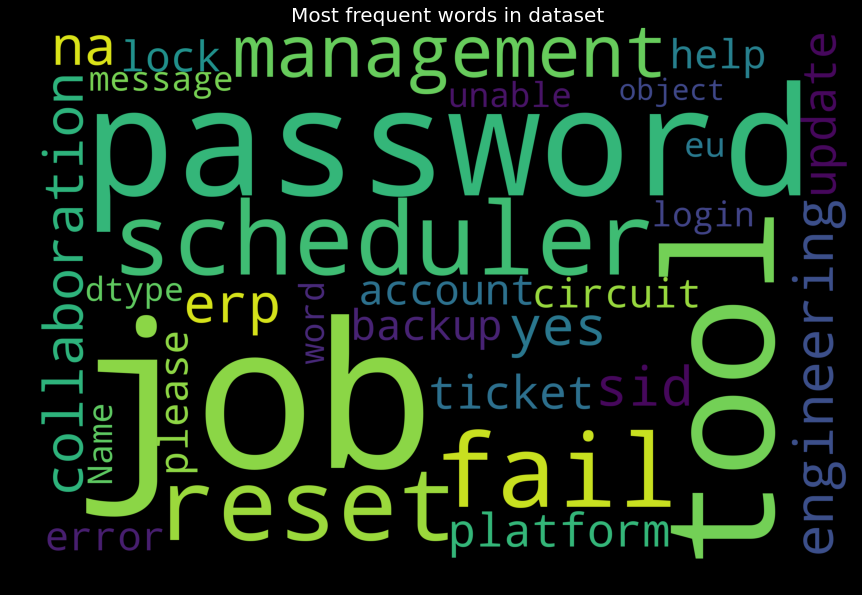

In [ ]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(ans_bigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [ ]:
#generate trigram
ans_trigram = generate_ngrams(desc_cleaned, 3, 20)

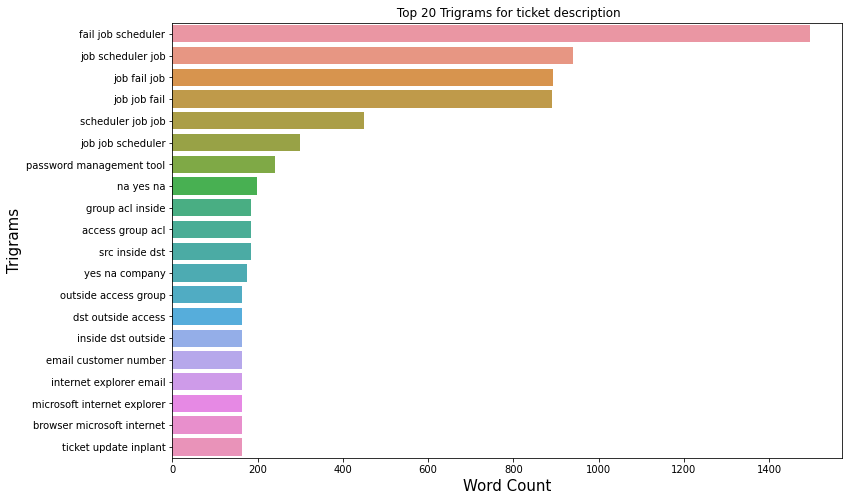

In [ ]:
#generate barplot for bigram
plt.figure(figsize=(12,8))
sns.barplot(ans_trigram["wordcount"],ans_trigram["word"])
plt.xlabel("Word Count", fontsize=15)
plt.ylabel("Trigrams", fontsize=15)
plt.title(" Top 20 Trigrams for ticket description")
plt.show()

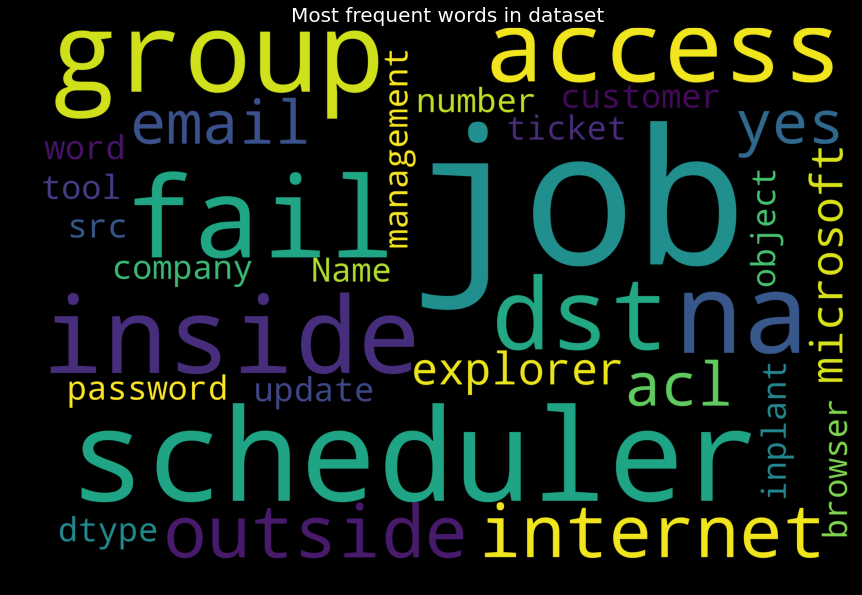

In [ ]:
# define wordcloud function from wordcloud library. set some parameteres for beatuful plotting
wc = WordCloud(width = 3000,
    height = 2000,max_words=300,
    background_color = 'black')

# generate word cloud for data
wc_word=wc.generate(str(ans_trigram['word']))
print(wc_word)

# declare our figure 
plt.figure(figsize=(20,10), facecolor='k')

# add title to the graph
plt.title("Most frequent words in dataset", fontsize=20,color='white')
plt.imshow(wc_word)
plt.show()

In [ ]:
#Convert  Combined text from each sentense to the words. use of simple_process as it tokenize() internally
#https://radimrehurek.com/gensim/utils.html#gensim.utils.simple_preprocess
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [ ]:
data_words = list(sent_to_words(df_ML['combined_description']))

In [ ]:
print(len(data_words))

7860


In [ ]:
# Build the bigram and trigram models
#https://radimrehurek.com/gensim/models/phrases.html
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [ ]:
print(bigram_mod[data_words[1]])

['outlook', 'team', 'meeting', 'skype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [ ]:
print(trigram_mod[data_words[1]])

['outlook', 'team', 'meeting', 'skype', 'meeting', 'etc', 'appear', 'outlook', 'calendar', 'somebody', 'please', 'advise', 'correct', 'kind']


In [ ]:
def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

In [ ]:
# Form Bigrams
data_words_trigrams = make_trigrams(data_words)

In [ ]:
wordclouds=' '.join(map(str, data_words_trigrams))

In [ ]:
wordCloudfinal = wordclouds.replace('\', \'',' ').replace(']',' ').replace('[',' ').replace('\'','').replace('   ',' ').replace('*','')

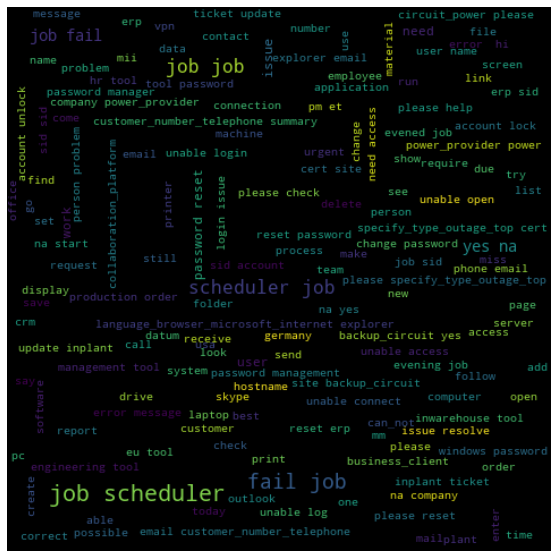

In [ ]:
wordcloud = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10).generate(wordCloudfinal)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [ ]:
new_df = df_ML.copy()
new_df['words'] = data_words_trigrams
new_df.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                         Description             Caller  \
0  verified user details. employee and manager na...  spxjnwir pjlcoqds   
1  team my meetings/skype meetings etc are not ap...  hmjdrvpb komuaywn   
2                     hi i cannot log on to vpn best  eylqgodm ybqkwiam   
3                      unable to access hr tool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group New Assignment Group  \
0            GRP_0                GRP_0   
1            GRP_0                GRP_0   
2            GRP_0                GRP_0   
3            GRP_0                GRP_0   
4            GRP_0                GRP_0   

                                combined_description pred_group Language  \
0  login issue verify user detail employee manage...        NaN       en   
1  outlook team meeting skype meeting etc appear ...        NaN       en   
2            can not log vpn hi can not log vpn best        NaN       en   
3  unable access hr tool page unable access hr to...        NaN       en   
4                            skype error skype error        NaN       no   

                                               words  
0  [login, issue, verify, user, detail, employee,...  
1  [outlook, team, meeting, skype, meeting, etc, ...  
2   [can_not, log, vpn, hi, can_not, log, vpn, best]  
3  [unable, access, hr, tool, page, unable, acces...  
4                       [skype, error, skype, error]

In [ ]:
sortedListOfGroup = df_ML['New Assignment Group'].value_counts().sort_values(ascending=False).index
sortedListOfGroup

Index(['GRP_0', 'GRP_8', 'GRP_24', 'GRP_9', 'GRP_12', 'GRP_19', 'GRP_2',
       'GRP_3', 'GRP_6', 'GRP_13', 'GRP_10', 'GRP_5', 'GRP_14', 'GRP_25',
       'GRP_33', 'GRP_29', 'GRP_4', 'GRP_18', 'GRP_99', 'GRP_16', 'GRP_31',
       'GRP_34', 'GRP_26', 'GRP_28', 'GRP_40', 'GRP_41', 'GRP_30', 'GRP_42',
       'GRP_15', 'GRP_45', 'GRP_20', 'GRP_1', 'GRP_11', 'GRP_47', 'GRP_22',
       'GRP_62', 'GRP_48', 'GRP_7', 'GRP_17', 'GRP_39', 'GRP_27', 'GRP_60',
       'GRP_44', 'GRP_37', 'GRP_50', 'GRP_21', 'GRP_36', 'GRP_53'],
      dtype='object')

In [ ]:
def wordcloud_grp(f, x):
    wordclouds_0=' '.join(map(str, f))

    wc = WordCloud(width=480, height=480, max_font_size=20, min_font_size=10, max_words=50).generate(wordclouds_0.replace('\'',''))
    plt.figure(figsize=(20,10))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title("Most common 50 words of {}".format(x))
    plt.margins(x=0, y=0)
    plt.show()

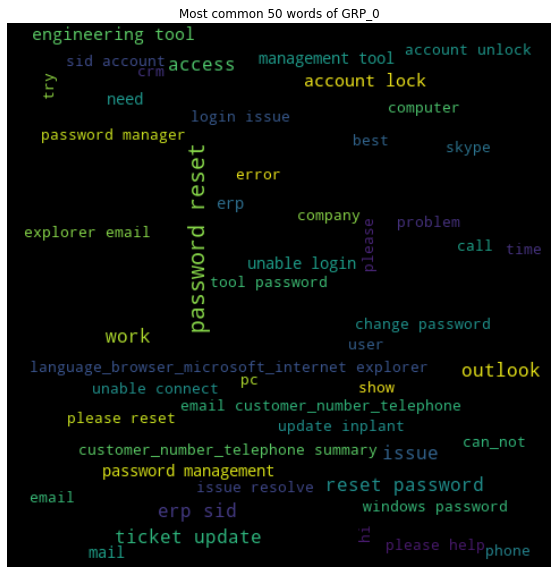

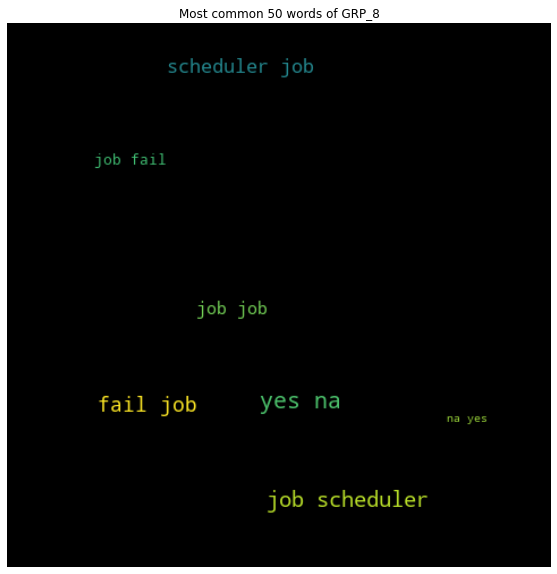

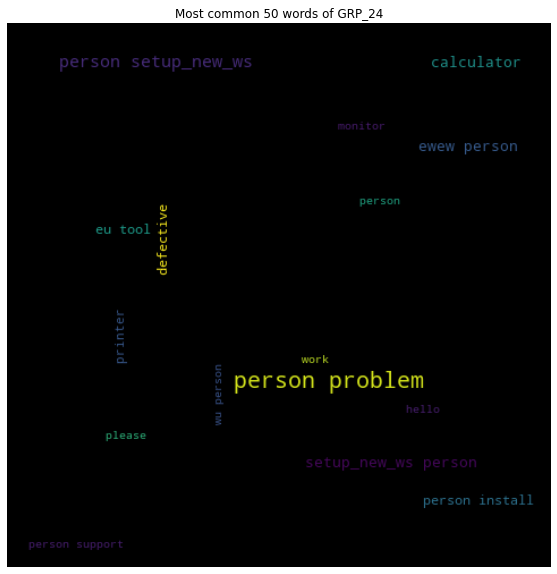

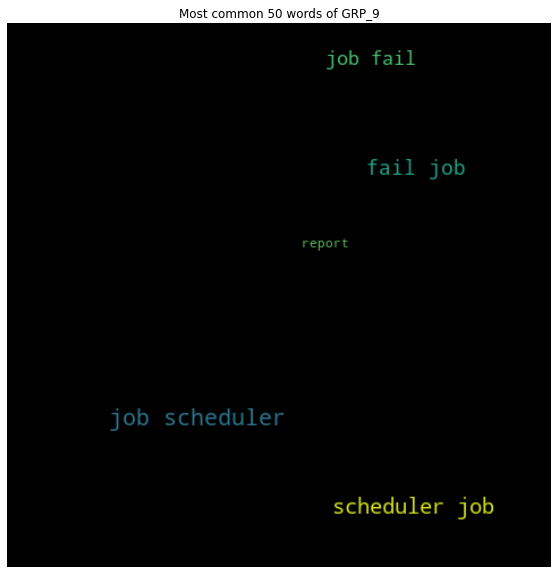

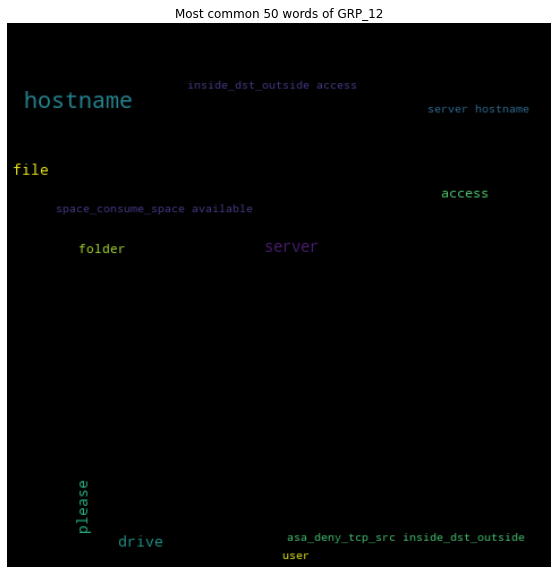

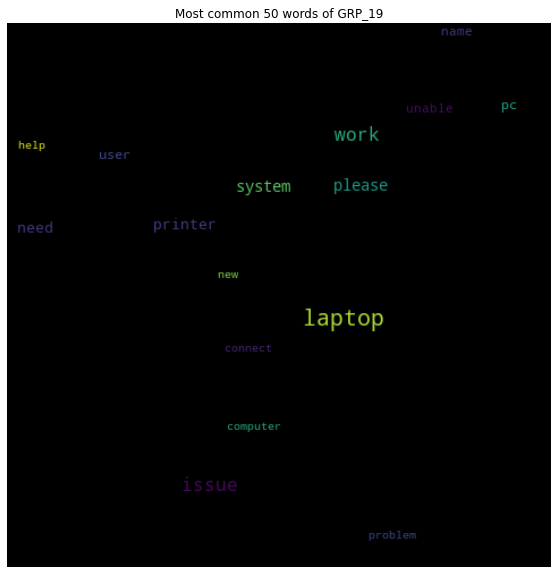

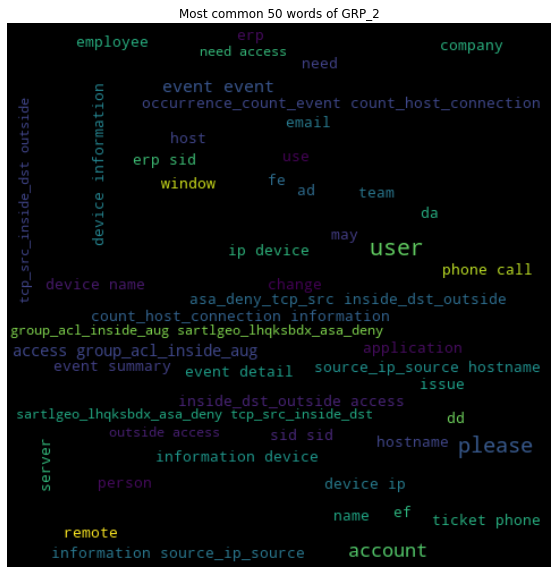

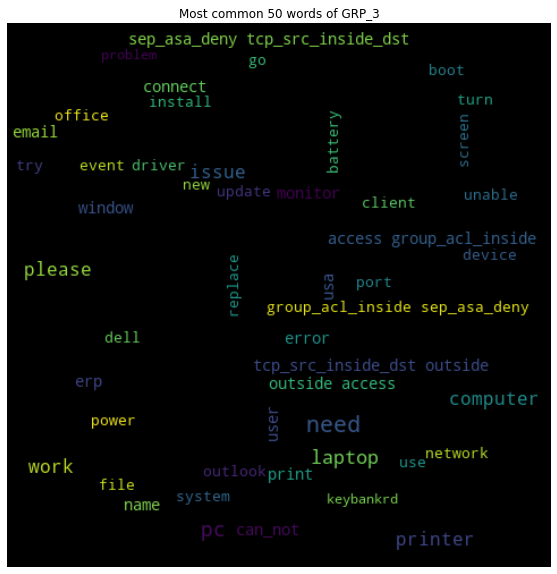

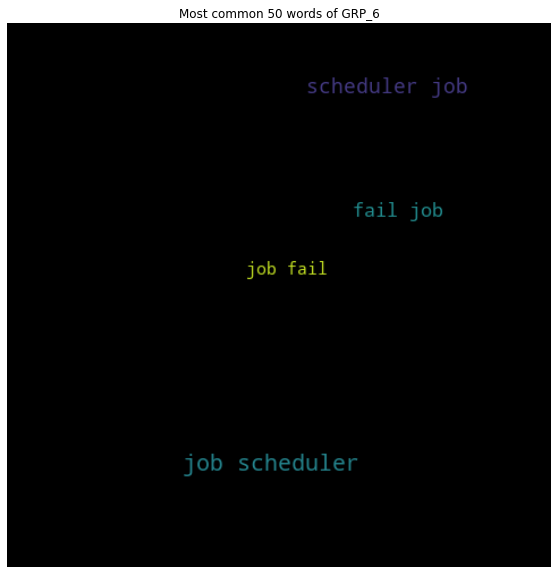

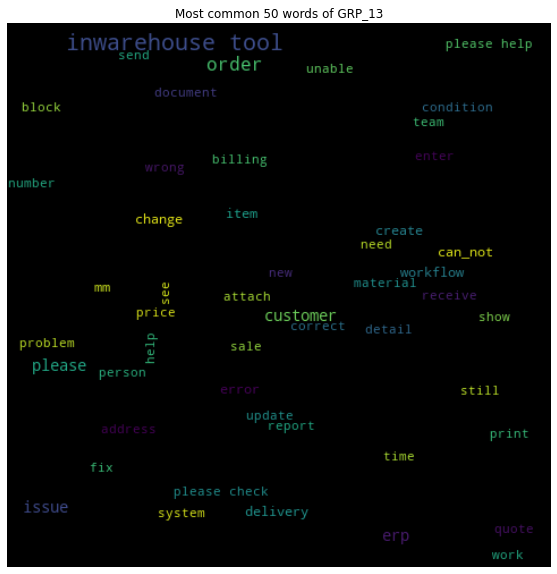

In [ ]:
for i in range(10):

    Grp = new_df[new_df ['New Assignment Group'] == sortedListOfGroup[i]]
    Grp = Grp['words']
    wordcloud_grp(Grp,sortedListOfGroup[i])

In [93]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   New Assignment Group  7860 non-null   object
 5   combined_description  7860 non-null   object
 6   pred_group            0 non-null      object
 7   Language              7860 non-null   object
dtypes: object(8)
memory usage: 491.4+ KB


In [94]:
df_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   New Assignment Group  7860 non-null   object
 5   combined_description  7860 non-null   object
 6   pred_group            0 non-null      object
 7   Language              7860 non-null   object
dtypes: object(8)
memory usage: 491.4+ KB


In [95]:
df_ML_Aug = df_ML.copy()
df_ML_NonAug = df_ML.copy()
df_DL_Aug = df_DL.copy()
df_DL_NonAug = df_DL.copy()

In [96]:
df_ML_Aug.shape, df_ML_NonAug.shape, df_DL_Aug.shape,df_DL_NonAug.shape

((7860, 8), (7860, 8), (7860, 8), (7860, 8))

In [97]:
df_ML_Aug.to_excel("df_ML_Aug.xlsx")
df_ML_NonAug.to_excel("df_ML_NonAug.xlsx")
df_DL_Aug.to_excel("df_DL_Aug.xlsx")
df_DL_NonAug.to_excel("df_DL_NonAug.xlsx")

**Modeling - ML Model**

**ML Model without uplsampling or augmentation**



In [98]:

df_ML_NonAug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   New Assignment Group  7860 non-null   object
 5   combined_description  7860 non-null   object
 6   pred_group            0 non-null      object
 7   Language              7860 non-null   object
dtypes: object(8)
memory usage: 491.4+ KB


In [99]:
df_ML_NonAug.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                         Description             Caller  \
0  verified user details. employee and manager na...  spxjnwir pjlcoqds   
1  team my meetings/skype meetings etc are not ap...  hmjdrvpb komuaywn   
2                     hi i cannot log on to vpn best  eylqgodm ybqkwiam   
3                      unable to access hr tool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group New Assignment Group  \
0            GRP_0                GRP_0   
1            GRP_0                GRP_0   
2            GRP_0                GRP_0   
3            GRP_0                GRP_0   
4            GRP_0                GRP_0   

                                combined_description pred_group Language  
0  login issue verify user detail employee manage...        NaN       en  
1  outlook team meeting skype meeting etc appear ...        NaN       en  
2            can not log vpn hi can not log vpn best        NaN       en  
3  unable access hr tool page unable access hr to...        NaN       en  
4                            skype error skype error        NaN       no

In [100]:
df_ML_NonAug['target'] = df_ML_NonAug['Assignment group'].astype('category').cat.codes

In [101]:
df_ML_NonAug.groupby(["Assignment group", "target"]).size()

Assignment group  target
GRP_0             0         3660
GRP_1             1           31
GRP_10            2          139
GRP_11            3           30
GRP_12            4          251
GRP_13            5          143
GRP_14            6          116
GRP_15            7           36
GRP_16            8           84
GRP_17            9           19
GRP_18            10          88
GRP_19            11         213
GRP_2             12         209
GRP_20            13          33
GRP_21            14          13
GRP_22            15          27
GRP_23            16           1
GRP_24            17         285
GRP_25            18         115
GRP_26            19          55
GRP_27            20          17
GRP_28            21          44
GRP_29            22          97
GRP_3             23         197
GRP_30            24          39
GRP_31            25          67
GRP_32            26           4
GRP_33            27         103
GRP_34            28          62
GRP_35            

In [102]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(df_ML_NonAug.combined_description  , 
                                                    df_ML_NonAug.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', X_test.shape, y_test.shape)

Shape of the training set: (6288,) (6288,)
Shape of the test set: (1572,) (1572,)


In [103]:
def fit_n_print(model, X_train, X_test, y_train, y_test):  # take the model, train data and test data as input
    
    start = time.time()  # note the start time 

    clf = model
    clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('model', model),
                     ])

    clf.fit(X_train, y_train)   # fit the model using the train data

    pred_train=clf.predict(X_train) # model predictions on the training data
    y_pred = clf.predict(X_test)   # model predictions on the test data
    
    accuracy_training = (accuracy_score(y_train,pred_train))*100 #accurancy on training
    accuracy_test= (accuracy_score(y_test,y_pred ))*100  #accuracy on test
    

    recallscore_training =(recall_score(y_train,pred_train,average='weighted'))*100  #recall on training
    recallscore_test = (recall_score(y_test,y_pred, average='weighted'))*100  #recall on test
    
    precision_training = (precision_score(y_train,pred_train, average='weighted'))*100
    precision_test = (precision_score(y_test,y_pred,average='weighted'))*100
    
    f1score_training = (f1_score(y_train,pred_train, average='weighted'))*100
    f1score_test = (f1_score(y_test,y_pred, average='weighted'))*100
        
    end = time.time()  #note the end time
       
    duration = end - start  # calculate the total duration

    print('Algorithm:', type(model).__name__)
    print("\n Classification report:\n", classification_report(y_test, y_pred))
    print("\n Confusion report:\n", confusion_matrix(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print()
    print("\n \n")
     
    

    return  accuracy_training,accuracy_test,recallscore_training, recallscore_test, precision_training,precision_test,f1score_training, f1score_test,  duration, y_pred  # return all the metrics along with predictions


In [104]:
import time

In [105]:
rf  = RandomForestClassifier()
xgb = XGBClassifier()
SVC = LinearSVC()
KNN = KNeighborsClassifier()
NB = MultinomialNB()

result = {}   # Create an empty dictionary to later use to store metrics of each of the models

for model, name  in zip([rf,xgb, SVC,KNN,NB], 
                         ['Random Forest', 'Xgboost', 'SVC','KNN','Naive Bayes']):
    result[name] = fit_n_print(model,X_train, X_test, y_train, y_test)

Algorithm: RandomForestClassifier

 Classification report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.77       733
           1       1.00      0.20      0.33         5
           2       1.00      0.24      0.39        29
           3       0.00      0.00      0.00         8
           4       0.63      0.51      0.56        61
           5       0.47      0.35      0.40        23
           6       0.75      0.25      0.38        24
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        10
           9       0.57      0.80      0.67         5
          10       0.83      0.22      0.34        23
          11       0.40      0.10      0.16        40
          12       0.59      0.25      0.35        40
          13       1.00      0.17      0.29         6
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         8
          16       0.

In [106]:
result_without_aug = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['accuracy_training','accuracy_test',
                                 'recallscore_training', 'recallscore_test', 
                                 'precision_training','precision_test',
                                 'f1score_training', 'f1score_test', 
                                 'Elapsed'],
                      index= result.keys())   # use the model names as index

result_without_aug.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result_without_aug

accuracy_training accuracy_test recallscore_training  \
Model                                                                
Random Forest           95.0382       63.1043              95.0382   
Xgboost                 78.1489       64.5674              78.1489   
SVC                     91.9688       68.3206              91.9688   
KNN                     69.4338        62.341              69.4338   
Naive Bayes             55.9001       55.2163              55.9001   

              recallscore_test precision_training precision_test  \
Model                                                              
Random Forest          63.1043            95.6395        57.7694   
Xgboost                64.5674            81.1785        61.3353   
SVC                    68.3206            92.6802        65.3473   
KNN                     62.341            71.7148        56.9352   
Naive Bayes            55.2163            40.7176        40.6733   

              f1score_training f1score_test   Elapsed  
Model                                                  
Random Forest          94.9112      55.4781    8.5089  
Xgboost                76.0116      58.4029   89.5253  
SVC                    91.7439      64.8431  0.674098  
KNN                    64.3132      54.8338    1.6148  
Naive Bayes            41.8322      40.7916    0.2861

**ML Model with augmentation**


1.   Split train test

2.   Augment data






In [107]:
df_ML_Aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   New Assignment Group  7860 non-null   object
 5   combined_description  7860 non-null   object
 6   pred_group            0 non-null      object
 7   Language              7860 non-null   object
dtypes: object(8)
memory usage: 491.4+ KB


In [108]:
df_ML_Aug.shape

(7860, 8)

In [109]:
df_ML_Aug.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr tool page   
4                    skype error   

                                         Description             Caller  \
0  verified user details. employee and manager na...  spxjnwir pjlcoqds   
1  team my meetings/skype meetings etc are not ap...  hmjdrvpb komuaywn   
2                     hi i cannot log on to vpn best  eylqgodm ybqkwiam   
3                      unable to access hr tool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group New Assignment Group  \
0            GRP_0                GRP_0   
1            GRP_0                GRP_0   
2            GRP_0                GRP_0   
3            GRP_0                GRP_0   
4            GRP_0                GRP_0   

                                combined_description pred_group Language  
0  login issue verify user detail employee manage...        NaN       en  
1  outlook team meeting skype meeting etc appear ...        NaN       en  
2            can not log vpn hi can not log vpn best        NaN       en  
3  unable access hr tool page unable access hr to...        NaN       en  
4                            skype error skype error        NaN       no

In [110]:
#import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [111]:
!pip install nlpaug

     |████████████████████████████████| 408 kB 2.7 MB/s 
     |████████████████████████████████| 11.3 MB 32.0 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [112]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

aug = naw.SynonymAug(aug_src='wordnet',aug_max=4)

In [113]:
# Take an example for augmentation
example=aug.augment(X_train[5],n=2)
print('\033[1mOriginal text:\033[0m')
print(X_train[5])
print('_'*100)
print('\033[1mAugmented text:\033[0m')
print(example[0])
print(example[1])

Original text:
unable log engineering tool skype unable log engineering tool skype
____________________________________________________________________________________________________
Augmented text:
ineffectual log technology tool skype ineffectual log engineering tool skype
ineffectual log engineering tool skype unable logarithm engineering tool skype


In [114]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in X_train.index:
  if y_train[i] in (24,9,12,2,19,3,6):
    temps=aug.augment(X_train[i],n=3)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (13,10,5,14,24,31,18,28,4,16,47):    
    temps=aug.augment(X_train[i],n=6)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (30,32,25,27,37,15,38,29,40,36,11,20,1,42,41,22):    
    temps=aug.augment(X_train[i],n=12)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (46,7,35,17,26,39,34,45,43,33,21,44):    
    temps=aug.augment(X_train[i],n=24)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])

In [115]:
df_ML_Aug['target'] = df_ML_Aug['Assignment group'].astype('category').cat.codes

In [116]:
# Create training and test datasets with 80:20 ratio without augmenatation
X_train, X_test, y_train, y_test = train_test_split(df_ML_Aug.combined_description, 
                                                    df_ML_Aug.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', X_test.shape, y_test.shape)

Shape of the training set: (6288,) (6288,)
Shape of the test set: (1572,) (1572,)


In [117]:
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)
print(X_train.shape)
print(y_train.shape)

(31626,)
(31626,)


In [118]:
y_train_df = pd. DataFrame(y_train,columns=['target'])

In [119]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31626 entries, 0 to 31625
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  31626 non-null  int64
dtypes: int64(1)
memory usage: 247.2 KB


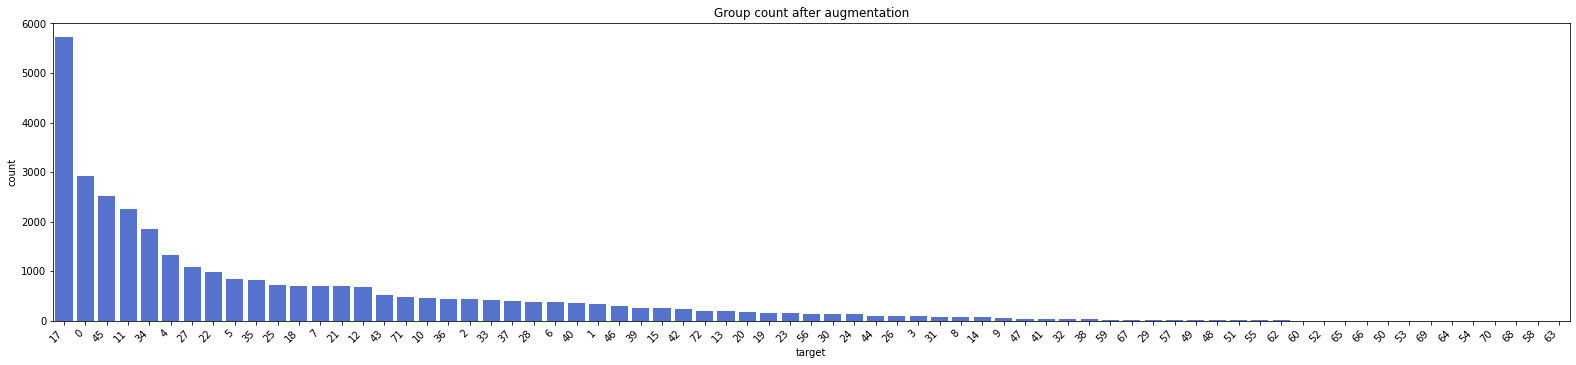

In [120]:
#Create Dataset 
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df['target'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='target', data=y_train_df, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count after augmentation')
plt.show()

In [121]:
rf  = RandomForestClassifier()
xgb = XGBClassifier()
SVC = LinearSVC()
KNN = KNeighborsClassifier()
NB = MultinomialNB()

result = {}   # Create an empty dictionary to later use to store metrics of each of the models

for model, name  in zip([rf,xgb, SVC,KNN,NB], 
                         ['Random Forest', 'Xgboost', 'SVC','KNN','Naive Bayes']):
    result[name] = fit_n_print(model,X_train, X_test, y_train, y_test)

Algorithm: RandomForestClassifier

 Classification report:
               precision    recall  f1-score   support

           0       0.68      0.94      0.79       733
           1       0.50      0.20      0.29         5
           2       1.00      0.24      0.39        29
           3       0.00      0.00      0.00         8
           4       0.65      0.54      0.59        61
           5       0.42      0.48      0.45        23
           6       0.67      0.25      0.36        24
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00        10
           9       0.62      1.00      0.77         5
          10       0.62      0.22      0.32        23
          11       0.35      0.30      0.32        40
          12       0.55      0.28      0.37        40
          13       1.00      0.17      0.29         6
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         8
          16       0.

In [122]:
result_with_aug = pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['accuracy_training','accuracy_test',
                                 'recallscore_training', 'recallscore_test', 
                                 'precision_training','precision_test',
                                 'f1score_training', 'f1score_test', 
                                 'Elapsed'],
                      index= result.keys())   # use the model names as index

result_with_aug.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result_with_aug

accuracy_training accuracy_test recallscore_training  \
Model                                                                
Random Forest           98.0712       63.6132              98.0712   
Xgboost                 91.3584       59.1603              91.3584   
SVC                     97.1131       64.0585              97.1131   
KNN                     95.4499       60.0509              95.4499   
Naive Bayes             78.8781       56.3613              78.8781   

              recallscore_test precision_training precision_test  \
Model                                                              
Random Forest          63.6132            98.2496        59.5113   
Xgboost                59.1603            91.6327        61.9264   
SVC                    64.0585            97.2605        63.4746   
KNN                    60.0509            95.3782        58.9458   
Naive Bayes            56.3613              81.85        56.1741   

              f1score_training f1score_test  Elapsed  
Model                                                 
Random Forest          98.0557      57.8908  49.6436  
Xgboost                91.1312      58.4391   328.05  
SVC                    97.0694       62.493  3.32892  
KNN                    94.9778      58.1015  20.2341  
Naive Bayes            75.9759      49.2487  1.21457

**ML Model with upsampling**

In [123]:
df_ML_US =df_ML_Aug.copy()

In [124]:
df_ML_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     7860 non-null   object
 1   Description           7860 non-null   object
 2   Caller                7860 non-null   object
 3   Assignment group      7860 non-null   object
 4   New Assignment Group  7860 non-null   object
 5   combined_description  7860 non-null   object
 6   pred_group            0 non-null      object
 7   Language              7860 non-null   object
 8   target                7860 non-null   int8  
dtypes: int8(1), object(8)
memory usage: 499.1+ KB


In [125]:
df_ML_US['target'] = df_ML_US['Assignment group'].astype('category').cat.codes

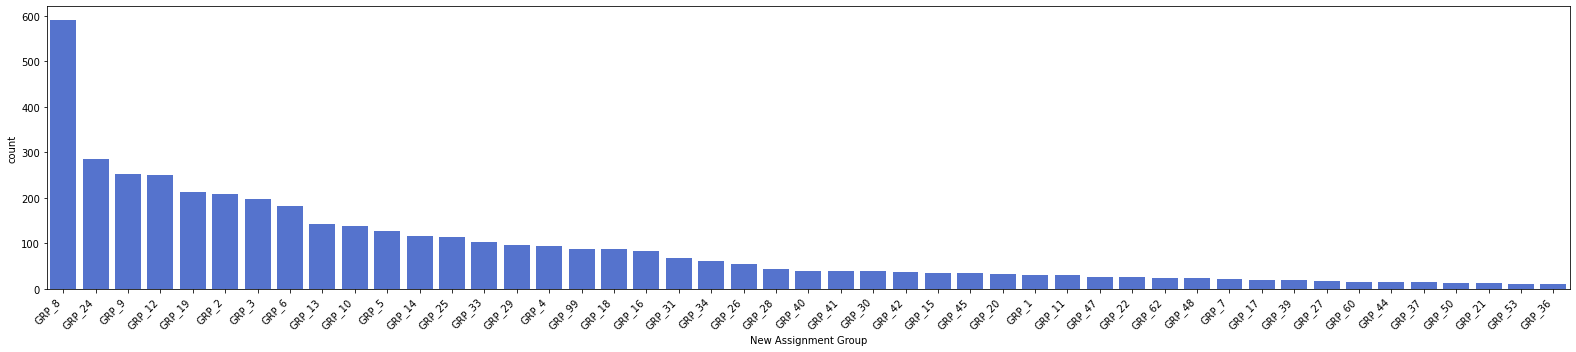

In [126]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
df_ML_US_nogrp0 = df_ML_US[df_ML_US['New Assignment Group'] != 'GRP_0']

descending_order = df_ML_US_nogrp0['New Assignment Group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='New Assignment Group', data=df_ML_US_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [127]:
maxcount = df_ML_US_nogrp0['New Assignment Group'].value_counts().max()
maxcount

591

In [128]:
df_ML_US_grp0 = df_ML_US[df_ML_US['New Assignment Group'] == 'GRP_0']

In [129]:
df_ML_US_grp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 0 to 7857
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     3660 non-null   object
 1   Description           3660 non-null   object
 2   Caller                3660 non-null   object
 3   Assignment group      3660 non-null   object
 4   New Assignment Group  3660 non-null   object
 5   combined_description  3660 non-null   object
 6   pred_group            0 non-null      object
 7   Language              3660 non-null   object
 8   target                3660 non-null   int8  
dtypes: int8(1), object(8)
memory usage: 260.9+ KB


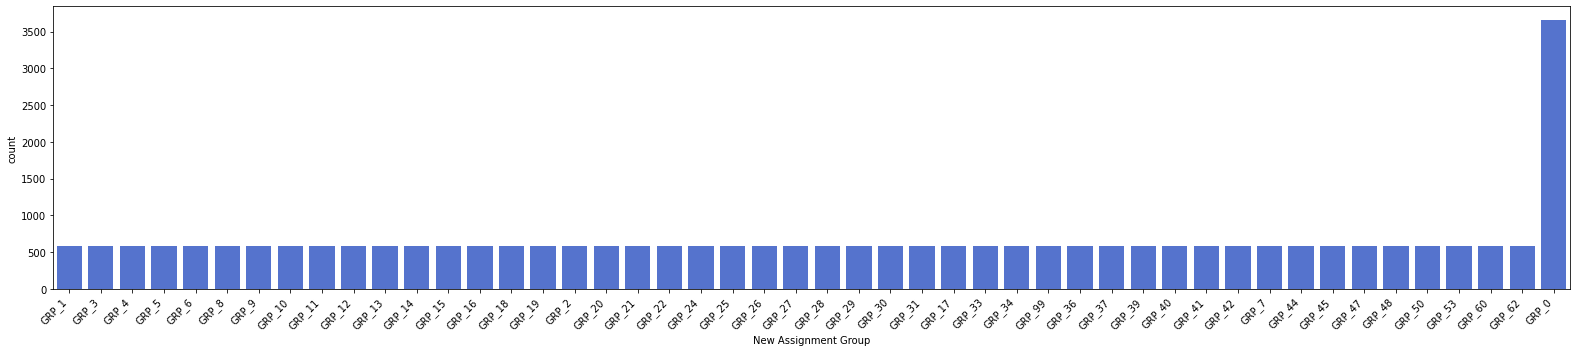

In [130]:
# Treat the imbalance in the dataset by resampling to 591

df_ML_US_nogrp0_upsampled = df_ML_US_nogrp0[0:0]
for grp in df_ML_US_nogrp0['New Assignment Group'].unique():
    df_ML_US_nogrp0_grp = df_ML_US_nogrp0[df_ML_US_nogrp0['New Assignment Group'] == grp]
    resampled = resample(df_ML_US_nogrp0_grp, replace=True, n_samples=int(maxcount), random_state=SEED)
    df_ML_US_nogrp0_upsampled = df_ML_US_nogrp0_upsampled.append(resampled)

dataset_ML_upsampled=pd.concat([df_ML_US_nogrp0_upsampled, df_ML_US_grp0],ignore_index=True)
descending_order = dataset_ML_upsampled['New Assignment Group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='New Assignment Group', data=dataset_ML_upsampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [131]:
# Create a column for target (assignment group) variable
dataset_ML_upsampled['target'] = dataset_ML_upsampled['New Assignment Group'].str[4:]
dataset_ML_upsampled['target'] = dataset_ML_upsampled['target'].astype('category').cat.codes

dataset_ML_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31437 entries, 0 to 31436
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     31437 non-null  object
 1   Description           31437 non-null  object
 2   Caller                31437 non-null  object
 3   Assignment group      31437 non-null  object
 4   New Assignment Group  31437 non-null  object
 5   combined_description  31437 non-null  object
 6   pred_group            0 non-null      object
 7   Language              31437 non-null  object
 8   target                31437 non-null  int8  
dtypes: int8(1), object(8)
memory usage: 1.9+ MB


In [132]:
dataset_ML_upsampled.groupby(["New Assignment Group", "target"]).size()

New Assignment Group  target
GRP_0                 0         3660
GRP_1                 1          591
GRP_10                2          591
GRP_11                3          591
GRP_12                4          591
GRP_13                5          591
GRP_14                6          591
GRP_15                7          591
GRP_16                8          591
GRP_17                9          591
GRP_18                10         591
GRP_19                11         591
GRP_2                 12         591
GRP_20                13         591
GRP_21                14         591
GRP_22                15         591
GRP_24                16         591
GRP_25                17         591
GRP_26                18         591
GRP_27                19         591
GRP_28                20         591
GRP_29                21         591
GRP_3                 22         591
GRP_30                23         591
GRP_31                24         591
GRP_33                25         591
GRP_34   

In [133]:
dataset_ML_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31437 entries, 0 to 31436
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Short description     31437 non-null  object
 1   Description           31437 non-null  object
 2   Caller                31437 non-null  object
 3   Assignment group      31437 non-null  object
 4   New Assignment Group  31437 non-null  object
 5   combined_description  31437 non-null  object
 6   pred_group            0 non-null      object
 7   Language              31437 non-null  object
 8   target                31437 non-null  int8  
dtypes: int8(1), object(8)
memory usage: 1.9+ MB


In [134]:
dataset_ML_upsampled.to_excel("dataset_ML_upsampled.xlsx")

In [135]:
# Create training and test datasets with 80:20 ratio without augmenatation
X_train, X_test, y_train, y_test = train_test_split(dataset_ML_upsampled.combined_description, 
                                                    dataset_ML_upsampled.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', X_test.shape, y_test.shape)

Shape of the training set: (25149,) (25149,)
Shape of the test set: (6288,) (6288,)


In [136]:
X_train.dtypes, X_test.dtypes, y_train.dtypes, y_test.dtypes

(dtype('O'), dtype('O'), dtype('int8'), dtype('int8'))

In [137]:
rf  = RandomForestClassifier()
xgb = XGBClassifier()
SVC = LinearSVC()
KNN = KNeighborsClassifier()
NB = MultinomialNB()

result = {}   # Create an empty dictionary to later use to store metrics of each of the models

for model, name  in zip([rf,xgb, SVC,KNN,NB], 
                         ['Random Forest', 'Xgboost', 'SVC','KNN','Naive Bayes']):
    result[name] = fit_n_print(model,X_train, X_test, y_train, y_test)

Algorithm: RandomForestClassifier

 Classification report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94       682
           1       0.87      1.00      0.93       105
           2       0.98      0.88      0.93       117
           3       1.00      1.00      1.00       126
           4       0.98      0.96      0.97       125
           5       0.99      0.95      0.97       117
           6       1.00      1.00      1.00       114
           7       1.00      1.00      1.00       113
           8       0.98      1.00      0.99       127
           9       0.99      1.00      1.00       106
          10       0.98      0.98      0.98       125
          11       0.97      0.87      0.92       131
          12       0.97      0.98      0.97       115
          13       1.00      1.00      1.00       115
          14       1.00      1.00      1.00       118
          15       1.00      1.00      1.00       125
          16       0.

In [138]:
result_ML_US= pd.DataFrame(np.array(list(result.values()))[:,:-1],    # make a dataframe out of the metrics from result dictionary 
                       columns= ['accuracy_training','accuracy_test',
                                 'recallscore_training', 'recallscore_test', 
                                 'precision_training','precision_test',
                                 'f1score_training', 'f1score_test', 
                                 'Elapsed'],
                      index= result.keys())   # use the model names as index

result_ML_US.index.name = 'Model'   # name the index of the result1 dataframe as 'Model'

result_ML_US

accuracy_training accuracy_test recallscore_training  \
Model                                                                
Random Forest           95.9919       94.7837              95.9919   
Xgboost                 89.6099       86.8162              89.6099   
SVC                     94.9223       92.3346              94.9223   
KNN                     91.1686       87.4046              91.1686   
Naive Bayes              72.655       69.2589               72.655   

              recallscore_test precision_training precision_test  \
Model                                                              
Random Forest          94.7837            97.5637        96.1177   
Xgboost                86.8162            91.5836         88.524   
SVC                    92.3346            96.4115         93.464   
KNN                    87.4046            92.9089        88.6808   
Naive Bayes            69.2589            86.9918        85.5484   

              f1score_training f1score_test  Elapsed  
Model                                                 
Random Forest           96.293      94.9563   27.186  
Xgboost                89.8043      86.7776  172.623  
SVC                    95.2116      92.4131  2.78671  
KNN                    91.3715      87.2089  19.8487  
Naive Bayes              74.34      71.0507  1.15696

In [274]:
result_ML_US.to_excel('result_ML_US.xlsx')

**ML model with upsampling has overcome the problem of overfitting. We will do randomised gridsearch on this for hypertuning.**

In [139]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, RandomizedSearchCV,cross_val_score, RepeatedStratifiedKFold,  StratifiedKFold


In [140]:
# Create training and test datasets with 80:20 ratio without augmenatation
X_train, X_test, y_train, y_test = train_test_split(dataset_ML_upsampled.combined_description, 
                                                    dataset_ML_upsampled.target, 
                                                    test_size=0.20, 
                                                    random_state=42)
print('\033[1mShape of the training set:\033[0m', X_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', X_test.shape, y_test.shape)

Shape of the training set: (25149,) (25149,)
Shape of the test set: (6288,) (6288,)


**HYPER TUNING RANDOM FOREST**

In [141]:
pipeline = Pipeline([
          ('vect', CountVectorizer()),
         ('tfidf', TfidfTransformer()),
         ('clf', RandomForestClassifier()),
         ])


parameters = {'vect__ngram_range': [(1, 1), (1, 2)],
              'tfidf__use_idf': (True, False),
              'clf__bootstrap': [True],
              'clf__max_depth': [ None, 10,20,30, 40,50],
              'clf__max_features': ['auto', 'sqrt'],
              'clf__min_samples_leaf': [None,1,2, 4, 8,10],
              'clf__n_estimators': [100]}


if __name__ == "__main__":
  grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1,cv=5)
  print("Performing grid search...")
  print("pipeline:", [name for name, _ in pipeline.steps])
  print("parameters:")
  print(parameters)
 
  RF_CV_Fit = grid_search.fit(X_train, y_train)
  #print("done in %0.3fs" % (time() - t0))
  print()
  
  print("Best score: %0.3f" % RF_CV_Fit.best_score_)
  print("Best parameters set:")
  best_parameters = RF_CV_Fit.best_estimator_.get_params()
  for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

  #print(RF_CV_Fit.cv_results_)

Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'vect__ngram_range': [(1, 1), (1, 2)], 'tfidf__use_idf': (True, False), 'clf__bootstrap': [True], 'clf__max_depth': [None, 10, 20, 30, 40, 50], 'clf__max_features': ['auto', 'sqrt'], 'clf__min_samples_leaf': [None, 1, 2, 4, 8, 10], 'clf__n_estimators': [100]}
Fitting 5 folds for each of 288 candidates, totalling 1440 fits

Best score: 0.940
Best parameters set:
	clf__bootstrap: True
	clf__max_depth: None
	clf__max_features: 'auto'
	clf__min_samples_leaf: 1
	clf__n_estimators: 100
	tfidf__use_idf: False
	vect__ngram_range: (1, 2)
{'mean_fit_time': array([ 0.74865465,  1.67359405,  0.78619723,  1.71098561, 28.84672332,
       74.43511553, 28.65673614, 74.95073571, 12.51527905, 28.4268507 ,
       12.27425117, 27.6733058 ,  8.93519526, 19.98553562,  8.57288623,
       18.65879254,  6.20619192, 12.49336271,  6.05820575, 11.6839551 ,
        5.48375521, 10.15132422,  5.22009912,  9.57310047,  0.71890039,
        1.599

In [142]:
print("Best score of Random Forest Hyper Tuning using GridSearchCV: %0.3f" % RF_CV_Fit.best_score_)

Best score of Random Forest Hyper Tuning using GridSearchCV: 0.940


In [248]:
RF_CV_Fit.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator': Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                 ('clf', RandomForestClassifier())]),
 'estimator__clf': RandomForestClassifier(),
 'estimator__clf__bootstrap': True,
 'estimator__clf__ccp_alpha': 0.0,
 'estimator__clf__class_weight': None,
 'estimator__clf__criterion': 'gini',
 'estimator__clf__max_depth': None,
 'estimator__clf__max_features': 'auto',
 'estimator__clf__max_leaf_nodes': None,
 'estimator__clf__max_samples': None,
 'estimator__clf__min_impurity_decrease': 0.0,
 'estimator__clf__min_samples_leaf': 1,
 'estimator__clf__min_samples_split': 2,
 'estimator__clf__min_weight_fraction_leaf': 0.0,
 'estimator__clf__n_estimators': 100,
 'estimator__clf__n_jobs': None,
 'estimator__clf__oob_score': False,
 'estimator__clf__random_state': None,
 'estimator__clf__verbose': 0,
 'estimator__clf__warm_start': False,
 'estimator__memory': None,
 'estimator__steps': [('vect', CountVectorizer()),
  (

#### Modeling - DL model

In [146]:
# Load the dataset 
#dataset2_DL = df_DL[df_DL['pred_group'].isna()]
dataset2_DL = pd.read_excel('/content/sample_data/df_DL_Aug.xlsx')

In [147]:
dataset2_DL.head()

Unnamed: 0              Short description  \
0           0                    login issue   
1           1                        outlook   
2           2             cant log in to vpn   
3           3  unable to access hr tool page   
4           4                    skype error   

                                         Description             Caller  \
0  verified user details. employee and manager na...  spxjnwir pjlcoqds   
1  team my meetings/skype meetings etc are not ap...  hmjdrvpb komuaywn   
2                     hi i cannot log on to vpn best  eylqgodm ybqkwiam   
3                      unable to access hr tool page  xbkucsvz gcpydteq   
4                                        skype error  owlgqjme qhcozdfx   

  Assignment group New Assignment Group  \
0            GRP_0                GRP_0   
1            GRP_0                GRP_0   
2            GRP_0                GRP_0   
3            GRP_0                GRP_0   
4            GRP_0                GRP_0   

                                combined_description  pred_group Language  
0  login issue verified user details  employee an...         NaN       en  
1  outlook team my meetings/skype meetings etc ar...         NaN       en  
2  cant log in to vpn hi i cannot log on to vpn best         NaN       en  
3  unable to access hr tool page unable to access...         NaN       en  
4                            skype error skype error         NaN       no

In [148]:
dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7860 non-null   int64  
 1   Short description     7860 non-null   object 
 2   Description           7860 non-null   object 
 3   Caller                7860 non-null   object 
 4   Assignment group      7860 non-null   object 
 5   New Assignment Group  7860 non-null   object 
 6   combined_description  7860 non-null   object 
 7   pred_group            0 non-null      float64
 8   Language              7860 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 552.8+ KB


In [ ]:
dataset2_DL = dataset2_DL[dataset2_DL['pred_group'].isna()]

In [149]:
dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7860 non-null   int64  
 1   Short description     7860 non-null   object 
 2   Description           7860 non-null   object 
 3   Caller                7860 non-null   object 
 4   Assignment group      7860 non-null   object 
 5   New Assignment Group  7860 non-null   object 
 6   combined_description  7860 non-null   object 
 7   pred_group            0 non-null      float64
 8   Language              7860 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 552.8+ KB


In [150]:
dataset2_DL.shape

(7860, 9)

In [151]:
# Create a column for target (assignment group) variable
dataset2_DL['group'] = dataset2_DL['New Assignment Group'].str[4:]
#from sklearn. preprocessing import LabelEncoder
#le = LabelEncoder()
#dataset2['group'] = le. fit_transform(dataset2['group'])
dataset2_DL['group'] = dataset2_DL['group'].astype('int8')
dataset2_DL['target'] = dataset2_DL['group'].astype('category').cat.codes

dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            7860 non-null   int64  
 1   Short description     7860 non-null   object 
 2   Description           7860 non-null   object 
 3   Caller                7860 non-null   object 
 4   Assignment group      7860 non-null   object 
 5   New Assignment Group  7860 non-null   object 
 6   combined_description  7860 non-null   object 
 7   pred_group            0 non-null      float64
 8   Language              7860 non-null   object 
 9   group                 7860 non-null   int8   
 10  target                7860 non-null   int8   
dtypes: float64(1), int64(1), int8(2), object(7)
memory usage: 568.1+ KB


In [152]:
dataset2_DL.groupby(["group", "target"]).size()

group  target
0      0         3660
1      1           31
2      2          209
3      3          197
4      4           95
5      5          128
6      6          182
7      7           21
8      8          591
9      9          252
10     10         139
11     11          30
12     12         251
13     13         143
14     14         116
15     15          36
16     16          84
17     17          19
18     18          88
19     19         213
20     20          33
21     21          13
22     22          27
24     23         285
25     24         115
26     25          55
27     26          17
28     27          44
29     28          97
30     29          39
31     30          67
33     31         103
34     32          62
36     33          11
37     34          15
39     35          19
40     36          40
41     37          40
42     38          37
44     39          15
45     40          35
47     41          27
48     42          25
50     43          14
53     44         

In [153]:
dataset2_DL=dataset2_DL.drop(columns=['Unnamed: 0'],axis=1)

In [154]:
dataset2_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     7860 non-null   object 
 1   Description           7860 non-null   object 
 2   Caller                7860 non-null   object 
 3   Assignment group      7860 non-null   object 
 4   New Assignment Group  7860 non-null   object 
 5   combined_description  7860 non-null   object 
 6   pred_group            0 non-null      float64
 7   Language              7860 non-null   object 
 8   group                 7860 non-null   int8   
 9   target                7860 non-null   int8   
dtypes: float64(1), int8(2), object(7)
memory usage: 506.7+ KB


## trying DL without augmentation or replacement

In [155]:
# Create a column for target (assignment group) variable
dataset2_DL_noaug=dataset2_DL.copy()

In [156]:
max_features = 10000
maxlen = 300
embedding_size = 200

In [157]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(dataset2_DL_noaug['combined_description']))
X = tokenizer.texts_to_sequences(dataset2_DL_noaug['combined_description'])

In [158]:
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(dataset2_DL_noaug['target'])
#print sample headline and lable
print(f'\nsample headline:\n{X[0]}\n\n Label of sample headline: {Y[0]}')


sample headline:
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0 

In [159]:
tokenizer.word_index

{'to': 1,
 'the': 2,
 'in': 3,
 'job': 4,
 'is': 5,
 'not': 6,
 'and': 7,
 'on': 8,
 'for': 9,
 'i': 10,
 'a': 11,
 'at': 12,
 'no': 13,
 'please': 14,
 'password': 15,
 'scheduler': 16,
 'erp': 17,
 'of': 18,
 'failed': 19,
 'this': 20,
 'tool': 21,
 'it': 22,
 'unable': 23,
 'access': 24,
 'company': 25,
 'with': 26,
 'na': 27,
 'user': 28,
 'reset': 29,
 'yes': 30,
 'my': 31,
 'issue': 32,
 'sid': 33,
 'from': 34,
 'you': 35,
 'person': 36,
 'ticket': 37,
 'error': 38,
 'account': 39,
 'hostname': 40,
 'have': 41,
 'outlook': 42,
 'be': 43,
 'can': 44,
 'are': 45,
 'login': 46,
 'email': 47,
 'help': 48,
 'that': 49,
 'working': 50,
 'am': 51,
 'we': 52,
 'need': 53,
 'system': 54,
 'e': 55,
 'name': 56,
 'as': 57,
 'when': 58,
 'id': 59,
 'has': 60,
 'or': 61,
 'network': 62,
 'by': 63,
 'but': 64,
 'message': 65,
 'if': 66,
 'was': 67,
 'printer': 68,
 'update': 69,
 'new': 70,
 'site': 71,
 'server': 72,
 'vpn': 73,
 'an': 74,
 'engineering': 75,
 'x': 76,
 'out': 77,
 'f': 78,
 

In [160]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

11849


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Extract Glove embedding zip file
# from zipfile import ZipFile
# with ZipFile('/content/drive/MyDrive/Great_Learning/NLP_sarcasm_detection/glove.6B.200d.txt', 'r') as z:
#   z.extractall()

In [161]:
EMBEDDING_FILE = '/content/drive/MyDrive/Great_Learning/NLP_sarcasm_detection/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    #print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    #print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [162]:
# Create training and test datasets with 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = SEED, shuffle = True)
print('\033[1mShape of the training set:\033[0m', x_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', x_test.shape, y_test.shape)

print(f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print(f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')

Shape of the training set: (6288, 300) (6288,)
Shape of the test set: (1572, 300) (1572,)

Number of rows in training dataset: 6288
Number of columns in training dataset: 300
Number of unique words in training dataset: 8657

Number of rows in test dataset: 1572
Number of columns in test dataset: 300
Number of unique words in test dataset: 4447


In [163]:
# converting y data into categorical (one-hot encoding)
ytrain = to_categorical(y_train)
ytest = to_categorical(y_test)

In [164]:
print(f'\nsample headline:\n{x_train[50]}\n\n Label of sample headline: {ytrain[50]}\n\n Label of sample headline: {y_train[50]}')


sample headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

In [165]:
num_class = len(np.unique(y_train))
num_class

48

In [166]:
num_class_test = len(np.unique(y_test))
num_class_test

48

In [167]:
num_class_all = len(np.unique(dataset2_DL['group'].values))
num_class_all

48

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 200)          2369800   
                                                                 
 bidirectional (Bidirectiona  (None, 256)              336896    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 100)               25700     
                                                                 
 dense_1 (Dense)             (None, 48)                4848      
                                                             

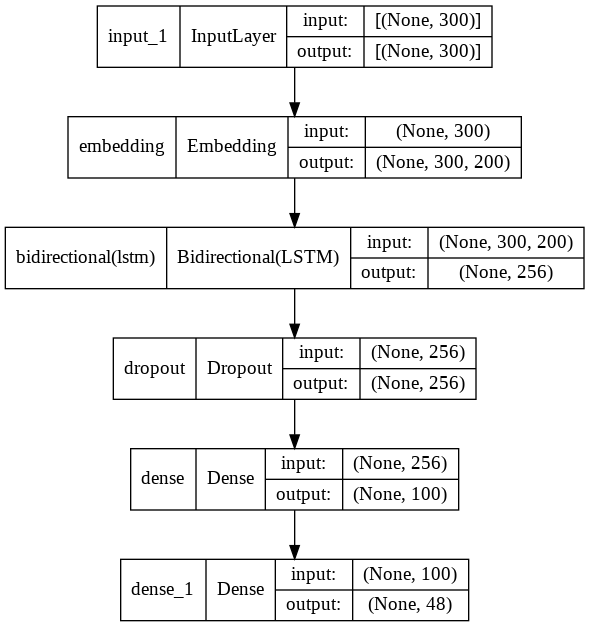

In [168]:
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(num_words,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(num_class,activation='softmax')(dense)

model_td = Model(input_layer,out)
model_td.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model_td.summary()
tf.keras.utils.plot_model(model_td, show_shapes = True)

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode = 'auto', verbose = 1, patience = 5)  
mc = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=2, min_lr=0.0001)

In [ ]:
batch_size = 100
epochs = 10
model_td_history = model_td.fit(x_train,ytrain,batch_size=batch_size, epochs=epochs, callbacks=[es,mc,lr_reduction], validation_data = (x_test, ytest),verbose=True)

Epoch 1/10
63/63 [==============================] - ETA: 0s - loss: 2.4370 - accuracy: 0.5003
Epoch 00001: val_accuracy improved from -inf to 0.54135, saving model to model-001-0.541349.h5
63/63 [==============================] - 10s 68ms/step - loss: 2.4370 - accuracy: 0.5003 - val_loss: 2.0312 - val_accuracy: 0.5413 - lr: 0.0010
Epoch 2/10
62/63 [============================>.] - ETA: 0s - loss: 1.8779 - accuracy: 0.5624
Epoch 00002: val_accuracy improved from 0.54135 to 0.58079, saving model to model-002-0.580789.h5
63/63 [==============================] - 4s 58ms/step - loss: 1.8789 - accuracy: 0.5625 - val_loss: 1.7864 - val_accuracy: 0.5808 - lr: 0.0010
Epoch 3/10
62/63 [============================>.] - ETA: 0s - loss: 1.6585 - accuracy: 0.5908
Epoch 00003: val_accuracy improved from 0.58079 to 0.58397, saving model to model-003-0.583969.h5
63/63 [==============================] - 4s 58ms/step - loss: 1.6592 - accuracy: 0.5899 - val_loss: 1.6954 - val_accuracy: 0.5840 - lr: 0.00

In [ ]:
# Evaluate the model & report accuracy
from keras.models import load_model
model_td_saved = load_model("model-010-0.634224.h5")
scores = model_td_saved.evaluate(x_test, ytest, batch_size = 100, verbose = 1)
print('Test accuracy: %.2f%%' % (scores[1]*100))

16/16 [==============================] - 1s 21ms/step - loss: 1.6348 - accuracy: 0.6342
Test accuracy: 63.42%


In [ ]:
#displaying the classification report on test/validation data
yfit = model_td_saved.predict(x_test)
test_predicted = np.argmax ( yfit, axis=-1 )
test = np.argmax ( ytest, axis=-1 )
from sklearn.metrics import classification_report
print(classification_report(test,test_predicted))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       737
           1       1.00      0.22      0.36         9
           2       0.39      0.48      0.43        46
           3       0.23      0.45      0.30        29
           4       0.55      0.50      0.52        24
           5       0.55      0.27      0.36        22
           6       0.54      0.58      0.56        26
           7       0.00      0.00      0.00         4
           8       0.63      0.83      0.72       129
           9       0.43      0.20      0.27        51
          10       0.57      0.48      0.52        25
          11       0.00      0.00      0.00         6
          12       0.49      0.59      0.54        51
          13       0.25      0.42      0.31        26
          14       0.19      0.22      0.21        18
          15       0.17      0.17      0.17         6
          16       0.33      0.38      0.35        16
          17       1.00    

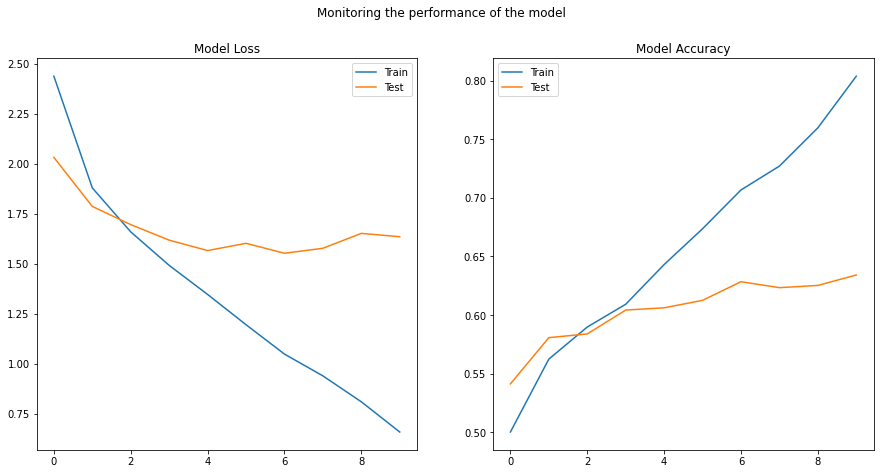

In [ ]:
#visualizing model performance  - loss and accuracy 
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Monitoring the performance of the model')

ax1.plot(model_td_history.history['loss'], label = 'Train')
ax1.plot(model_td_history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(model_td_history.history['accuracy'], label = 'Train')
ax2.plot(model_td_history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

#### DL Model with data Augmentation (synonym based)

In [ ]:
# Create training and test datasets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(dataset2_DL.combined_description, 
                                                    dataset2_DL.target, 
                                                    test_size=0.20, 
                                                    random_state=SEED)
print('\033[1mShape of the training set:\033[0m', X_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', X_test.shape, y_test.shape)

Shape of the training set: (6288,) (6288,)
Shape of the test set: (1572,) (1572,)


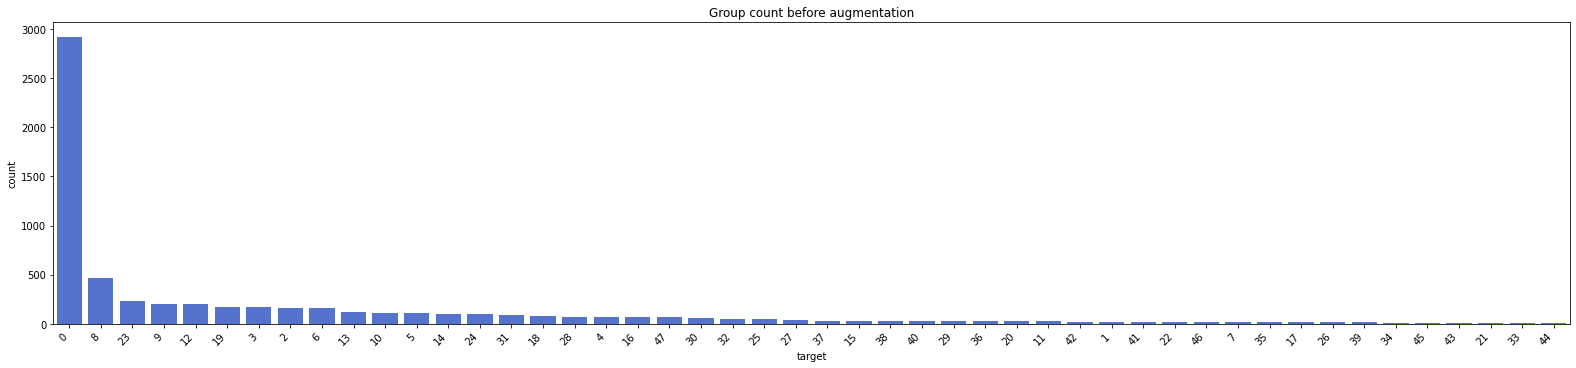

In [ ]:
#Create Dataset 
y_train_df_old = pd.DataFrame(y_train,columns=['target'])
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df_old['target'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='target', data=y_train_df_old, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count before augmentation')
plt.show()

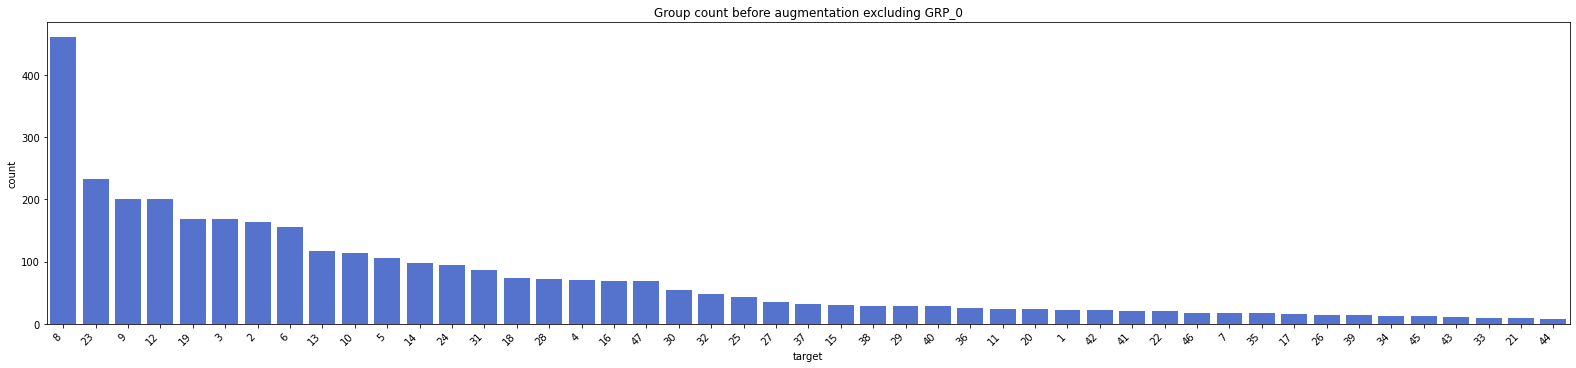

In [ ]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(y_train,columns=['group'])
y_train_df_old_nogrp0 = y_train_df_old[y_train_df_old['target'] != 0]

descending_order = y_train_df_old_nogrp0['target'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='target', data=y_train_df_old_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count before augmentation excluding GRP_0')
plt.show()

In [ ]:
# Take an example for augmentation
example=aug.augment(X_train[5],n=2)
print('\033[1mOriginal text:\033[0m')
print(X_train[5])
print('_'*100)
print('\033[1mAugmented text:\033[0m')
print(example[0])
print(example[1])

Original text:
unable to log in to engineering tool and skype unable to log in to engineering tool and skype
____________________________________________________________________________________________________
Augmented text:
unable to log in to engineering putz and skype unable to lumber in to engine room tool and skype
unable to log in to engineering tool and skype ineffective to log in to engineering prick and skype


In [ ]:
augmented_sentences=[]
augmented_sentences_labels=[]
for i in X_train.index:
  if y_train[i] in (24,9,12,2,19,3,6):
    temps=aug.augment(X_train[i],n=3)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (13,10,5,14,24,31,18,28,4,16,47):    
    temps=aug.augment(X_train[i],n=6)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (30,32,25,27,37,15,38,29,40,36,11,20,1,42,41,22):    
    temps=aug.augment(X_train[i],n=12)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])
  elif y_train[i] in (46,7,35,17,26,39,34,45,43,33,21,44):    
    temps=aug.augment(X_train[i],n=24)
    for sent in temps:
      augmented_sentences.append(sent)
      augmented_sentences_labels.append(y_train[i])

In [ ]:
X_train=X_train.append(pd.Series(augmented_sentences),ignore_index=True)
y_train=y_train.append(pd.Series(augmented_sentences_labels),ignore_index=True)

print(X_train.shape)
print(y_train.shape)

(24621,)
(24621,)


In [ ]:
y_train_df = pd. DataFrame(y_train,columns=['target'])

In [ ]:
y_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24621 entries, 0 to 24620
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   target  24621 non-null  int64
dtypes: int64(1)
memory usage: 192.5 KB


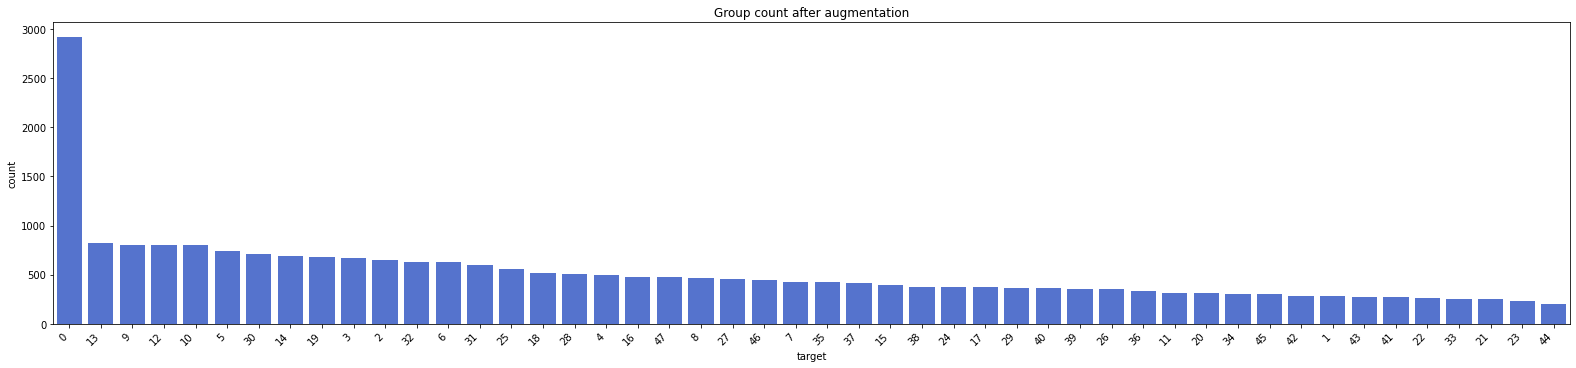

In [ ]:
#Create Dataset 
#y_train_df_old_nogrp0 = dataset1[dataset1['Assignment group'] != 'GRP_0']

descending_order = y_train_df['target'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='target', data=y_train_df, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count after augmentation')
plt.show()

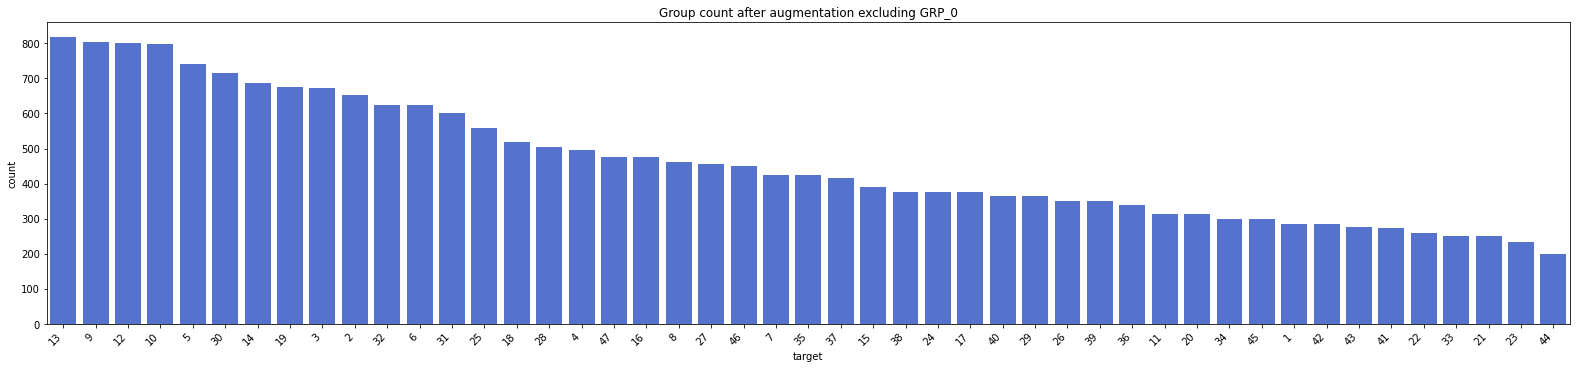

In [ ]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
#y_train_df_old = pd. DataFrame(y_train,columns=['group'])
y_train_df_nogrp0 = y_train_df[y_train_df['target'] != 0]

descending_order = y_train_df_nogrp0['target'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='target', data=y_train_df_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.title('Group count after augmentation excluding GRP_0')
plt.show()

In [ ]:
y_train_df.groupby(['target']).size()

target
0     2923
1      286
2      652
3      672
4      497
5      742
6      624
7      425
8      462
9      804
10     798
11     312
12     800
13     819
14     686
15     390
16     476
17     375
18     518
19     676
20     312
21     250
22     260
23     233
24     376
25     559
26     350
27     455
28     504
29     364
30     715
31     602
32     624
33     250
34     300
35     425
36     338
37     416
38     377
39     350
40     364
41     273
42     286
43     275
44     200
45     300
46     450
47     476
dtype: int64

In [ ]:
max_features = 10000
maxlen = 300
embedding_size = 200

In [ ]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(X_train)
x_train = tokenizer.texts_to_sequences(X_train)

In [ ]:
x_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
x_train = pad_sequences(x_train, padding='pre', maxlen = maxlen)
x_test = pad_sequences(x_test, padding='pre', maxlen = maxlen)
#Y = np.asarray(dataset2_DL['group'])

In [ ]:
#print sample headline and lable
print(f'\nsample headline:\n{x_train[0]}\n\n Label of sample headline: {y_train[0]}')


sample headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

In [ ]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'in': 3,
 'is': 4,
 'job': 5,
 'and': 6,
 'a': 7,
 'for': 8,
 'not': 9,
 'on': 10,
 'at': 11,
 'of': 12,
 'please': 13,
 'i': 14,
 'this': 15,
 'scheduler': 16,
 'it': 17,
 'erp': 18,
 "'": 19,
 'hostname': 20,
 'be': 21,
 'no': 22,
 'from': 23,
 'with': 24,
 'failed': 25,
 'you': 26,
 'are': 27,
 'tool': 28,
 'company': 29,
 'e': 30,
 'can': 31,
 'we': 32,
 'access': 33,
 'error': 34,
 'that': 35,
 'password': 36,
 'sid': 37,
 'user': 38,
 'have': 39,
 'as': 40,
 'c': 41,
 'issue': 42,
 'd': 43,
 'system': 44,
 'by': 45,
 'my': 46,
 'unable': 47,
 'id': 48,
 'ticket': 49,
 'f': 50,
 'when': 51,
 'help': 52,
 'plant': 53,
 'person': 54,
 'or': 55,
 'need': 56,
 'but': 57,
 'event': 58,
 'has': 59,
 'reset': 60,
 'account': 61,
 'working': 62,
 'usa': 63,
 'email': 64,
 's': 65,
 'if': 66,
 'cannot': 67,
 'an': 68,
 'server': 69,
 'see': 70,
 'name': 71,
 'up': 72,
 'order': 73,
 'message': 74,
 'am': 75,
 'information': 76,
 't': 77,
 'data': 78,
 'crm': 79,
 'bel

In [ ]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

13619


In [ ]:
# Mounting Google Drive
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Extract Glove embedding zip file
#from zipfile import ZipFile
#with ZipFile('drive/My Drive/datasets/NLP/sarcasm_detection/Glove.6B.200d.zip', 'r') as z:
  #z.extractall()

In [ ]:
EMBEDDING_FILE = '/content/drive/MyDrive/Great_Learning/NLP_sarcasm_detection/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
   # word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [ ]:
#splitting dataset into train and test datasets
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = SEED, shuffle = True)

print(f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print(f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')


Number of rows in training dataset: 24621
Number of columns in training dataset: 300
Number of unique words in training dataset: 9791

Number of rows in test dataset: 1572
Number of columns in test dataset: 300
Number of unique words in test dataset: 3273


In [ ]:
print(f'\nsample headline:\n{x_train[5]}\n\n Label of sample headline: {y_train[5]}')


sample headline:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 36 60 36 60]

 Label of sample headline: 0


In [ ]:
num_class = len(np.unique(y_train.values))
num_class

48

In [ ]:
num_class_test = len(np.unique(y_test.values))
num_class_test

48

In [ ]:
num_class_all = len(np.unique(dataset2_DL['group'].values))
num_class_all

48

In [ ]:
# converting y data into categorical (one-hot encoding)
ytrain = to_categorical(y_train)
ytest = to_categorical(y_test)

In [ ]:
print(f'\nsample headline:\n{x_train[50]}\n\n Label of sample headline:\n{ytrain[50]}\n\n Label of sample headline:\n{y_train[50]}')


sample headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

In [ ]:
ytest.shape[0],ytest.shape[1]

(1572, 48)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 200)          2723800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               25700     
                                                                 
 dense_3 (Dense)             (None, 48)                4848      
                                                           

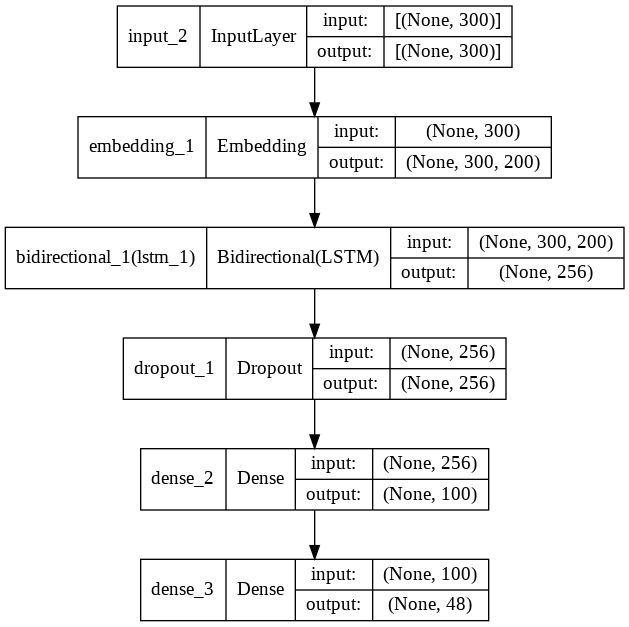

In [ ]:
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(num_words,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(num_class,activation='softmax')(dense)

model_td = Model(input_layer,out)
model_td.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model_td.summary()
tf.keras.utils.plot_model(model_td, show_shapes = True)

In [ ]:
es = EarlyStopping(monitor='val_accuracy', mode = 'auto', verbose = 1, patience = 5)  
mc = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=2, min_lr=0.0001)

In [ ]:
batch_size = 100
epochs = 10
model_td_history = model_td.fit(x_train,ytrain,batch_size=batch_size, epochs=epochs, callbacks=[es,mc,lr_reduction], validation_data = (x_test, ytest),verbose=True)

Epoch 1/10
246/247 [============================>.] - ETA: 0s - loss: 2.8070 - accuracy: 0.2579
Epoch 00001: val_accuracy improved from -inf to 0.50445, saving model to model-001-0.504453.h5
247/247 [==============================] - 16s 56ms/step - loss: 2.8061 - accuracy: 0.2581 - val_loss: 2.0431 - val_accuracy: 0.5045 - lr: 0.0010
Epoch 2/10
247/247 [==============================] - ETA: 0s - loss: 1.0065 - accuracy: 0.7027
Epoch 00002: val_accuracy improved from 0.50445 to 0.55216, saving model to model-002-0.552163.h5
247/247 [==============================] - 13s 53ms/step - loss: 1.0065 - accuracy: 0.7027 - val_loss: 2.2042 - val_accuracy: 0.5522 - lr: 0.0010
Epoch 3/10
246/247 [============================>.] - ETA: 0s - loss: 0.4488 - accuracy: 0.8731
Epoch 00003: val_accuracy improved from 0.55216 to 0.57824, saving model to model-003-0.578244.h5
247/247 [==============================] - 13s 53ms/step - loss: 0.4485 - accuracy: 0.8732 - val_loss: 2.3411 - val_accuracy: 0.5

In [ ]:
# Evaluate the model & report accuracy
from keras.models import load_model
model_td_saved = load_model("model-009-0.617684.h5")
scores = model_td_saved.evaluate(x_test, ytest, batch_size = 100, verbose = 1)
print('Test accuracy: %.2f%%' % (scores[1]*100))

16/16 [==============================] - 1s 21ms/step - loss: 2.7936 - accuracy: 0.6177
Test accuracy: 61.77%


In [ ]:
#displaying the classification report on test/validation data
yfit = model_td_saved.predict(x_test)
test_predicted = np.argmax ( yfit, axis=-1 )
test = np.argmax ( ytest, axis=-1 )
from sklearn.metrics import classification_report
print(classification_report(test,test_predicted))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       737
           1       0.23      0.33      0.27         9
           2       0.38      0.24      0.29        46
           3       0.28      0.31      0.30        29
           4       0.48      0.42      0.44        24
           5       0.50      0.36      0.42        22
           6       0.54      0.58      0.56        26
           7       0.00      0.00      0.00         4
           8       0.64      0.76      0.70       129
           9       0.39      0.24      0.29        51
          10       0.65      0.44      0.52        25
          11       0.20      0.17      0.18         6
          12       0.59      0.47      0.52        51
          13       0.58      0.54      0.56        26
          14       0.41      0.39      0.40        18
          15       0.25      0.17      0.20         6
          16       0.25      0.12      0.17        16
          17       0.44    

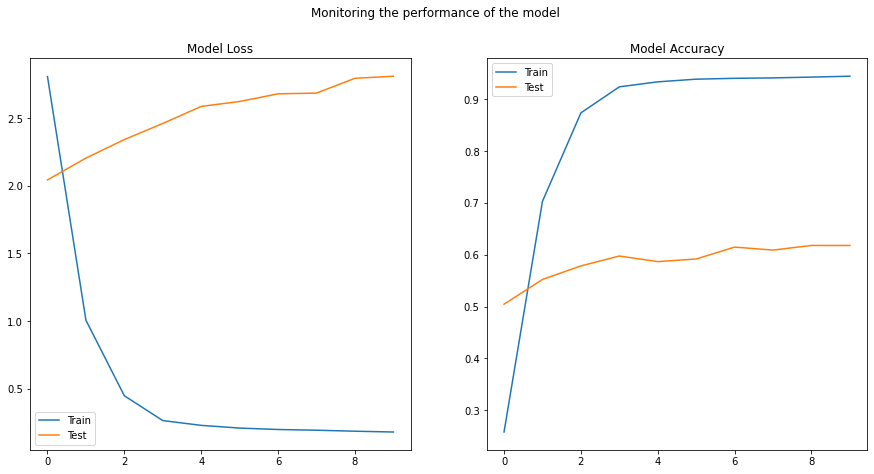

In [ ]:
#visualizing model performance  - loss and accuracy 
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Monitoring the performance of the model')

ax1.plot(model_td_history.history['loss'], label = 'Train')
ax1.plot(model_td_history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(model_td_history.history['accuracy'], label = 'Train')
ax2.plot(model_td_history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

### DL model with Upsampling/resampling technique (to treat class imabalance)

In [169]:
dataset2_DL_US=dataset2_DL.copy()

In [170]:
dataset2_DL_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7860 entries, 0 to 7859
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     7860 non-null   object 
 1   Description           7860 non-null   object 
 2   Caller                7860 non-null   object 
 3   Assignment group      7860 non-null   object 
 4   New Assignment Group  7860 non-null   object 
 5   combined_description  7860 non-null   object 
 6   pred_group            0 non-null      float64
 7   Language              7860 non-null   object 
 8   group                 7860 non-null   int8   
 9   target                7860 non-null   int8   
dtypes: float64(1), int8(2), object(7)
memory usage: 506.7+ KB


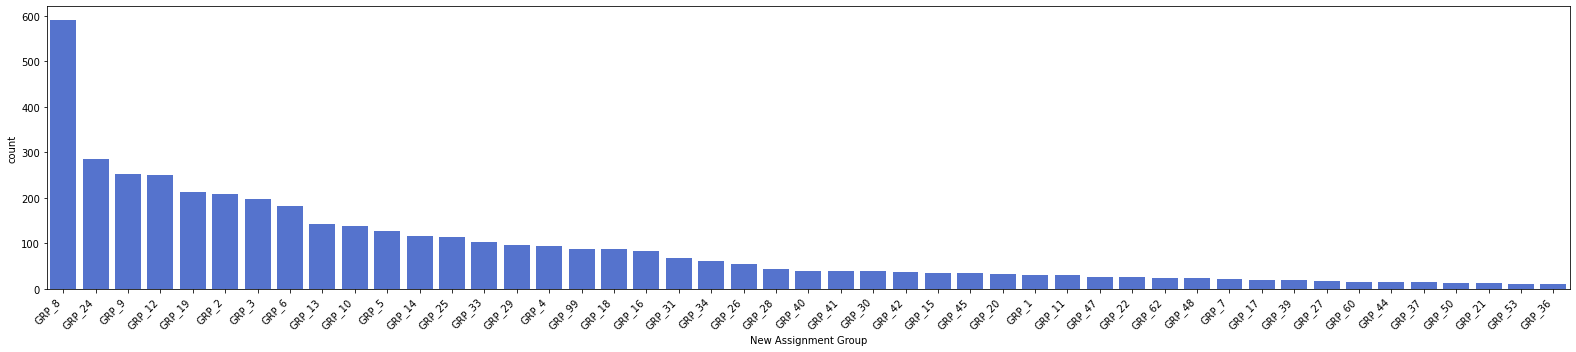

In [171]:
#Create Dataset for 'others' i.e all groups which is not part of GRP_0
dataset2_DL_nogrp0 = dataset2_DL_US[dataset2_DL_US['New Assignment Group'] != 'GRP_0']

descending_order = dataset2_DL_nogrp0['New Assignment Group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='New Assignment Group', data=dataset2_DL_nogrp0, color='royalblue',order=descending_order)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [172]:
maxcount = dataset2_DL_nogrp0['New Assignment Group'].value_counts().max()
maxcount

591

In [173]:

dataset2_DL_grp0 = dataset2_DL_US[dataset2_DL_US['New Assignment Group'] == 'GRP_0']

In [174]:
dataset2_DL_grp0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3660 entries, 0 to 7857
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     3660 non-null   object 
 1   Description           3660 non-null   object 
 2   Caller                3660 non-null   object 
 3   Assignment group      3660 non-null   object 
 4   New Assignment Group  3660 non-null   object 
 5   combined_description  3660 non-null   object 
 6   pred_group            0 non-null      float64
 7   Language              3660 non-null   object 
 8   group                 3660 non-null   int8   
 9   target                3660 non-null   int8   
dtypes: float64(1), int8(2), object(7)
memory usage: 264.5+ KB


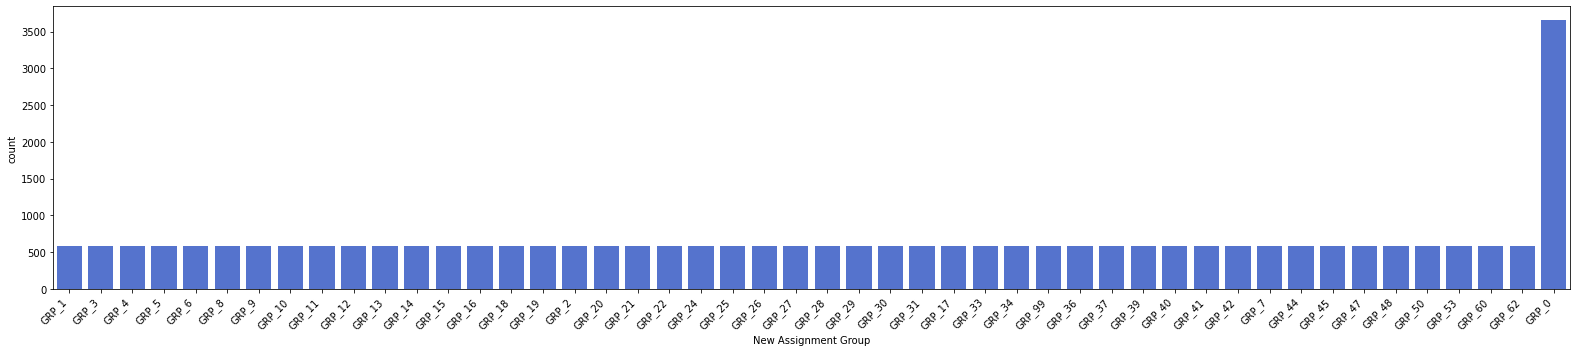

In [175]:
## Treat the imbalance in the dataset by resampling to 591

dataset2_DL_nogrp0_upsampled = dataset2_DL_nogrp0[0:0]
for grp in dataset2_DL_nogrp0['New Assignment Group'].unique():
    dataset2_DL_nogrp0_grp = dataset2_DL_nogrp0[dataset2_DL_nogrp0['New Assignment Group'] == grp]
    resampled = resample(dataset2_DL_nogrp0_grp, replace=True, n_samples=int(maxcount), random_state=123)
    dataset2_DL_nogrp0_upsampled = dataset2_DL_nogrp0_upsampled.append(resampled)

dataset2_DL_upsampled=pd.concat([dataset2_DL_nogrp0_upsampled, dataset2_DL_grp0],ignore_index=True)
descending_order = dataset2_DL_upsampled['New Assignment Group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='New Assignment Group', data=dataset2_DL_upsampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [176]:
# Create a column for target (assignment group) variable
dataset2_DL_upsampled['group'] = dataset2_DL_upsampled['New Assignment Group'].str[4:]
#from sklearn. preprocessing import LabelEncoder
#le = LabelEncoder()
#dataset2['group'] = le. fit_transform(dataset2['group'])
dataset2_DL_upsampled['group'] = dataset2_DL_upsampled['group'].astype('int8')
dataset2_DL_upsampled['target'] = dataset2_DL_upsampled['group'].astype('category').cat.codes

dataset2_DL_upsampled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31437 entries, 0 to 31436
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Short description     31437 non-null  object 
 1   Description           31437 non-null  object 
 2   Caller                31437 non-null  object 
 3   Assignment group      31437 non-null  object 
 4   New Assignment Group  31437 non-null  object 
 5   combined_description  31437 non-null  object 
 6   pred_group            0 non-null      float64
 7   Language              31437 non-null  object 
 8   group                 31437 non-null  int8   
 9   target                31437 non-null  int8   
dtypes: float64(1), int8(2), object(7)
memory usage: 2.0+ MB


In [177]:
dataset2_DL_upsampled.groupby(["group", "target"]).size()

group  target
0      0         3660
1      1          591
2      2          591
3      3          591
4      4          591
5      5          591
6      6          591
7      7          591
8      8          591
9      9          591
10     10         591
11     11         591
12     12         591
13     13         591
14     14         591
15     15         591
16     16         591
17     17         591
18     18         591
19     19         591
20     20         591
21     21         591
22     22         591
24     23         591
25     24         591
26     25         591
27     26         591
28     27         591
29     28         591
30     29         591
31     30         591
33     31         591
34     32         591
36     33         591
37     34         591
39     35         591
40     36         591
41     37         591
42     38         591
44     39         591
45     40         591
47     41         591
48     42         591
50     43         591
53     44         

In [178]:
max_features = 10000
maxlen = 300
embedding_size = 200

In [179]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(list(dataset2_DL_upsampled['combined_description']))
X = tokenizer.texts_to_sequences(dataset2_DL_upsampled['combined_description'])

In [180]:
X = pad_sequences(X, maxlen = maxlen)
Y = np.asarray(dataset2_DL_upsampled['target'])
#print sample headline and lable
print(f'\nsample headline:\n{X[0]}\n\n Label of sample headline: {Y[0]}')


sample headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

In [181]:
tokenizer.word_index

{'the': 1,
 'to': 2,
 'in': 3,
 'is': 4,
 'and': 5,
 'job': 6,
 'a': 7,
 'not': 8,
 'for': 9,
 'on': 10,
 'please': 11,
 'i': 12,
 'at': 13,
 'of': 14,
 'this': 15,
 'it': 16,
 'erp': 17,
 'tool': 18,
 'no': 19,
 'from': 20,
 'scheduler': 21,
 'hostname': 22,
 'with': 23,
 'password': 24,
 'are': 25,
 'you': 26,
 'failed': 27,
 'company': 28,
 'be': 29,
 'error': 30,
 'sid': 31,
 'user': 32,
 'access': 33,
 'we': 34,
 'that': 35,
 'have': 36,
 'can': 37,
 'e': 38,
 'issue': 39,
 'as': 40,
 'my': 41,
 'person': 42,
 'unable': 43,
 'reset': 44,
 'c': 45,
 'system': 46,
 'd': 47,
 'need': 48,
 'ticket': 49,
 'help': 50,
 'or': 51,
 'working': 52,
 'id': 53,
 'when': 54,
 'by': 55,
 'account': 56,
 'plant': 57,
 'has': 58,
 'crm': 59,
 'f': 60,
 'but': 61,
 'if': 62,
 'message': 63,
 'see': 64,
 'email': 65,
 'event': 66,
 'new': 67,
 'an': 68,
 'usa': 69,
 'below': 70,
 'am': 71,
 'server': 72,
 'was': 73,
 'name': 74,
 'cannot': 75,
 'order': 76,
 'all': 77,
 'outlook': 78,
 'number': 79

In [182]:
word_index= tokenizer.word_index

In [183]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

11703


In [ ]:
# # Mounting Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Extract Glove embedding zip file
#from zipfile import ZipFile
# with ZipFile('/content/drive/MyDrive/Great_Learning/archive.zip', 'r') as z:
#   z.extractall()

In [184]:
EMBEDDING_FILE = '/content/drive/MyDrive/Great_Learning/NLP_sarcasm_detection/glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd

# load the whole embedding into memory
#embeddings_index = dict()
#f = open(project_path+'word2vec_vector.txt')

#for line in f:
#	values = line.split()
#	word = values[0]
#	coefs = np.asarray(values[1:], dtype='float32')
#	embeddings_index[word] = coefs
#f.close()
#print('Loaded %s word vectors.' % len(embeddings_index))

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
	embedding_vector = embeddings.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [185]:
# Create training and test datasets with 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = SEED, shuffle = True)
print('\033[1mShape of the training set:\033[0m', x_train.shape, y_train.shape)
print('\033[1mShape of the test set:\033[0m', x_test.shape, y_test.shape)

print(f'\nNumber of rows in training dataset: {x_train.shape[0]}')
print(f'Number of columns in training dataset: {x_train.shape[1]}')
print(f'Number of unique words in training dataset: {len(np.unique(np.hstack(x_train)))}')

print(f'\nNumber of rows in test dataset: {x_test.shape[0]}')
print(f'Number of columns in test dataset: {x_test.shape[1]}')
print(f'Number of unique words in test dataset: {len(np.unique(np.hstack(x_test)))}')

Shape of the training set: (25149, 300) (25149,)
Shape of the test set: (6288, 300) (6288,)

Number of rows in training dataset: 25149
Number of columns in training dataset: 300
Number of unique words in training dataset: 9549

Number of rows in test dataset: 6288
Number of columns in test dataset: 300
Number of unique words in test dataset: 7518


In [186]:
num_class = len(np.unique(y_train))
num_class

48

In [187]:
num_class_test = len(np.unique(y_test))
num_class_test

48

In [188]:
num_class_all = len(np.unique(dataset2_DL_upsampled['group'].values))
num_class_all

48

In [189]:
# converting y data into categorical (one-hot encoding)
ytrain = to_categorical(y_train,48)
ytest = to_categorical(y_test,48)

In [190]:
print(f'\nsample headline:\n{x_train[50]}\n\n Label of sample headline: {ytrain[50]}\n\n Label of sample headline: {y_train[50]}')


sample headline:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 200)          2340600   
                                                                 
 lstm_1 (LSTM)               (None, 128)               168448    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               12900     
                                                                 
 dense_3 (Dense)             (None, 48)                4848      
                                                                 
Total params: 2,526,796
Trainable params: 2,526,796
Non-tra

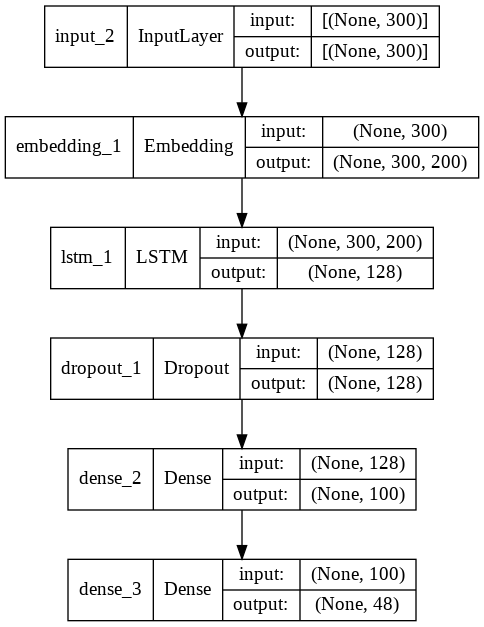

In [191]:
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(num_words,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
lstm= LSTM(128)(embed)
drop=Dropout(0.3)(lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(num_class,activation='softmax')(dense)

model_lstm= Model(input_layer,out)
model_lstm.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model_lstm.summary()
tf.keras.utils.plot_model(model_lstm, show_shapes = True)

In [192]:
es = EarlyStopping(monitor='val_accuracy', mode = 'auto', verbose = 1, patience = 5)  
mc = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=2, min_lr=0.0001)

In [193]:
batch_size = 100
epochs = 10
model_lstm_history = model_lstm.fit(x_train,ytrain,batch_size=batch_size, epochs=epochs, 
                                callbacks=[es,mc,lr_reduction], validation_data = (x_test, ytest),verbose=True)

Epoch 1/10
251/252 [============================>.] - ETA: 0s - loss: 2.5652 - accuracy: 0.3347
Epoch 00001: val_accuracy improved from -inf to 0.60226, saving model to model-001-0.602258.h5
252/252 [==============================] - 12s 30ms/step - loss: 2.5631 - accuracy: 0.3352 - val_loss: 1.4336 - val_accuracy: 0.6023 - lr: 0.0010
Epoch 2/10
251/252 [============================>.] - ETA: 0s - loss: 1.0235 - accuracy: 0.7097
Epoch 00002: val_accuracy improved from 0.60226 to 0.81791, saving model to model-002-0.817907.h5
252/252 [==============================] - 7s 28ms/step - loss: 1.0229 - accuracy: 0.7098 - val_loss: 0.6330 - val_accuracy: 0.8179 - lr: 0.0010
Epoch 3/10
251/252 [============================>.] - ETA: 0s - loss: 0.5176 - accuracy: 0.8495
Epoch 00003: val_accuracy improved from 0.81791 to 0.88104, saving model to model-003-0.881043.h5
252/252 [==============================] - 7s 28ms/step - loss: 0.5179 - accuracy: 0.8495 - val_loss: 0.4006 - val_accuracy: 0.881

In [195]:
# Evaluate the model & report accuracy
from keras.models import load_model
model_lstm_saved = load_model("model-009-0.938931.h5")
scores = model_lstm_saved.evaluate(x_test, ytest, batch_size = 100, verbose = 1)
print('Test accuracy: %.2f%%' % (scores[1]*100))

63/63 [==============================] - 1s 10ms/step - loss: 0.2268 - accuracy: 0.9389
Test accuracy: 93.89%


In [229]:
model_lstm_saved.get_config()

{'input_layers': [['input_2', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 300),
    'dtype': 'int64',
    'name': 'input_2',
    'ragged': False,
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_2'},
  {'class_name': 'Embedding',
   'config': {'activity_regularizer': None,
    'batch_input_shape': (None, 300),
    'dtype': 'float32',
    'embeddings_constraint': None,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}},
    'embeddings_regularizer': None,
    'input_dim': 11703,
    'input_length': 300,
    'mask_zero': False,
    'name': 'embedding_1',
    'output_dim': 200,
    'trainable': True},
   'inbound_nodes': [[['input_2', 0, 0, {}]]],
   'name': 'embedding_1'},
  {'class_name': 'LSTM',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros',
     'confi

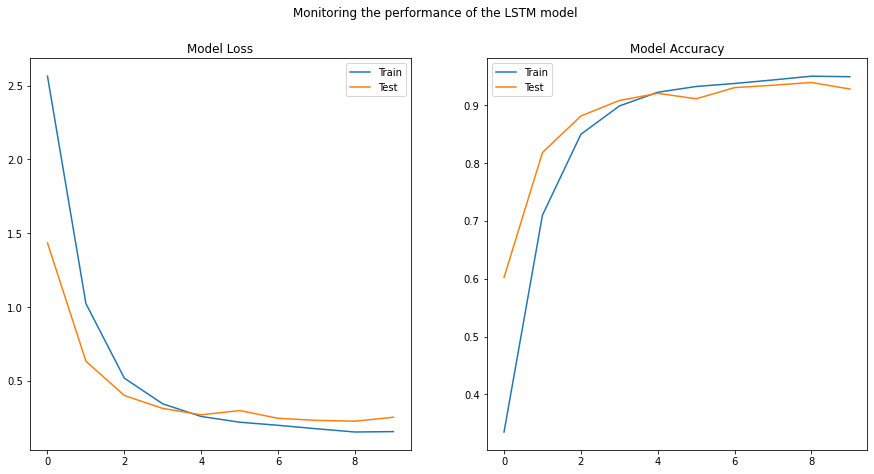

In [196]:
#visualizing model performance  - loss and accuracy 
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Monitoring the performance of the LSTM model')

ax1.plot(model_lstm_history.history['loss'], label = 'Train')
ax1.plot(model_lstm_history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(model_lstm_history.history['accuracy'], label = 'Train')
ax2.plot(model_lstm_history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

**BI-LSTM**

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_2 (Embedding)     (None, 300, 200)          2340600   
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              336896    
 nal)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               25700     
                                                                 
 dense_5 (Dense)             (None, 48)                4848      
                                                           

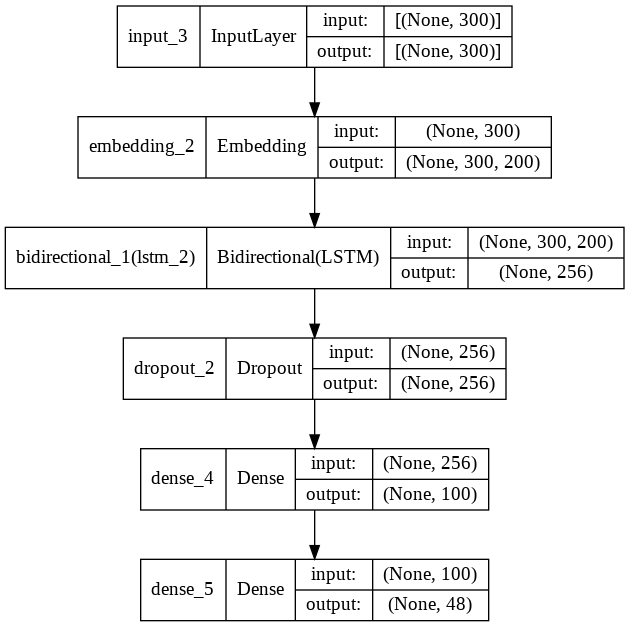

In [197]:
input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(num_words,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)  #weights=[embedding_matrix]
bi_lstm=Bidirectional(LSTM(128))(embed)
drop=Dropout(0.3)(bi_lstm)
dense =Dense(100,activation='relu')(drop)
out=Dense(num_class,activation='softmax')(dense)

model_bi_lstm = Model(input_layer,out)
model_bi_lstm.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model_bi_lstm.summary()
tf.keras.utils.plot_model(model_bi_lstm, show_shapes = True)

In [198]:
es = EarlyStopping(monitor='val_accuracy', mode = 'auto', verbose = 1, patience = 5)  
mc = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=2, min_lr=0.0001)

In [199]:
batch_size = 100
epochs = 10
model_bi_lstm_history = model_bi_lstm.fit(x_train,ytrain,batch_size=batch_size, epochs=epochs, 
                                callbacks=[es,mc,lr_reduction], validation_data = (x_test, ytest),verbose=True)

Epoch 1/10
251/252 [============================>.] - ETA: 0s - loss: 2.4454 - accuracy: 0.3561
Epoch 00001: val_accuracy improved from -inf to 0.64122, saving model to model-001-0.641221.h5
252/252 [==============================] - 17s 59ms/step - loss: 2.4432 - accuracy: 0.3567 - val_loss: 1.3081 - val_accuracy: 0.6412 - lr: 0.0010
Epoch 2/10
251/252 [============================>.] - ETA: 0s - loss: 0.9477 - accuracy: 0.7359
Epoch 00002: val_accuracy improved from 0.64122 to 0.83015, saving model to model-002-0.830153.h5
252/252 [==============================] - 14s 57ms/step - loss: 0.9469 - accuracy: 0.7361 - val_loss: 0.6202 - val_accuracy: 0.8302 - lr: 0.0010
Epoch 3/10
251/252 [============================>.] - ETA: 0s - loss: 0.4857 - accuracy: 0.8615
Epoch 00003: val_accuracy improved from 0.83015 to 0.88232, saving model to model-003-0.882316.h5
252/252 [==============================] - 14s 57ms/step - loss: 0.4863 - accuracy: 0.8614 - val_loss: 0.3994 - val_accuracy: 0.8

In [201]:
# Evaluate the model & report accuracy
from keras.models import load_model
model_bi_lstm_saved = load_model("model-009-0.935592.h5")
scores = model_bi_lstm_saved.evaluate(x_test, ytest, batch_size = 100, verbose = 1)
print('Test accuracy: %.2f%%' % (scores[1]*100))

63/63 [==============================] - 2s 20ms/step - loss: 0.2339 - accuracy: 0.9356
Test accuracy: 93.56%


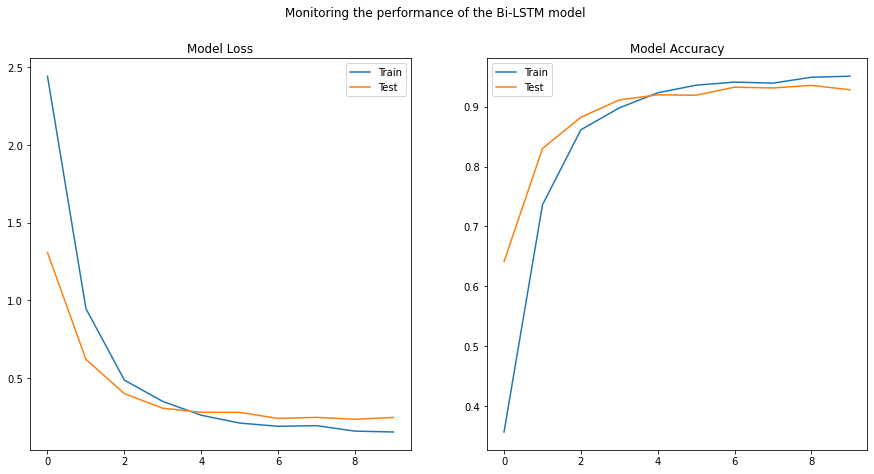

In [202]:
#visualizing model performance  - loss and accuracy 
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Monitoring the performance of the Bi-LSTM model')

ax1.plot(model_bi_lstm_history.history['loss'], label = 'Train')
ax1.plot(model_bi_lstm_history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(model_bi_lstm_history.history['accuracy'], label = 'Train')
ax2.plot(model_bi_lstm_history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

**Recurrent Neural Networks (RNN)**
RNN assigns more weights to the previous data points of sequence. Therefore, this technique is a powerful method for text, string and sequential data classification. Moreover, this technique could be used for image classification as we did in this work. In RNN, the neural net considers the information of previous nodes in a very sophisticated method which allows for better semantic analysis of the structures in the dataset.



**Gated Recurrent Unit (GRU)**

Gated Recurrent Unit (GRU) is a gating mechanism for RNN which was introduced by J. Chung et al. and K.Cho et al.. GRU is a simplified variant of the LSTM architecture, but there are differences as follows: GRU contains two gates and does not possess any internal memory. Second, non-linearity is not applied.

In [203]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, TimeDistributed, Activation
from keras.layers import Flatten, Permute, merge, Input
from keras.layers import Embedding
from keras.models import Model
from keras.layers import Input, Dense, multiply, concatenate, Dropout
from keras.layers import GRU, Bidirectional

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_3 (Embedding)     (None, 300, 200)          2340600   
                                                                 
 gru (GRU)                   (None, 128)               126720    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               12900     
                                                                 
 dense_7 (Dense)             (None, 48)                4848      
                                                                 
Total params: 2,485,068
Trainable params: 2,485,068
Non-tra

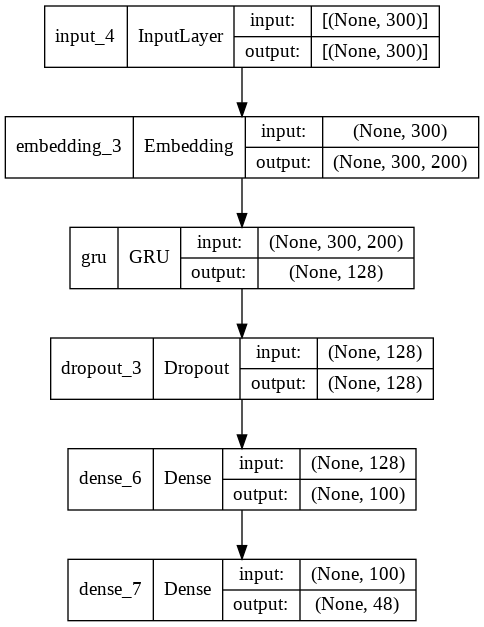

In [204]:


input_layer = Input(shape=(maxlen,),dtype=tf.int64)
embed = Embedding(num_words,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer) #weights=[embedding_matrix]
gru= GRU(128)(embed)
drop=Dropout(0.3)(gru)
dense =Dense(100,activation='relu')(drop)
out=Dense(len((pd.Series(y_train)).unique()),activation='softmax')(dense)   

model_GRU = Model(input_layer,out)
model_GRU.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model_GRU.summary()
tf.keras.utils.plot_model(model_GRU, show_shapes = True)


In [205]:
es = EarlyStopping(monitor='val_accuracy', mode = 'auto', verbose = 1, patience = 5)  
mc = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=1, monitor='val_accuracy',save_best_only=True, mode='auto')
lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=2, min_lr=0.0001)

In [206]:
batch_size = 100
epochs = 10
model_GRU_history = model_GRU.fit(x_train,ytrain,batch_size=batch_size, epochs=epochs, 
                                callbacks=[es,mc,lr_reduction], validation_data = (x_test, ytest),verbose=True)

Epoch 1/10
250/252 [============================>.] - ETA: 0s - loss: 2.6005 - accuracy: 0.3342
Epoch 00001: val_accuracy improved from -inf to 0.63200, saving model to model-001-0.631997.h5
252/252 [==============================] - 8s 26ms/step - loss: 2.5929 - accuracy: 0.3361 - val_loss: 1.3265 - val_accuracy: 0.6320 - lr: 0.0010
Epoch 2/10
250/252 [============================>.] - ETA: 0s - loss: 0.8889 - accuracy: 0.7568
Epoch 00002: val_accuracy improved from 0.63200 to 0.85051, saving model to model-002-0.850509.h5
252/252 [==============================] - 6s 25ms/step - loss: 0.8866 - accuracy: 0.7575 - val_loss: 0.5188 - val_accuracy: 0.8505 - lr: 0.0010
Epoch 3/10
250/252 [============================>.] - ETA: 0s - loss: 0.4205 - accuracy: 0.8801
Epoch 00003: val_accuracy improved from 0.85051 to 0.90506, saving model to model-003-0.905057.h5
252/252 [==============================] - 6s 25ms/step - loss: 0.4213 - accuracy: 0.8800 - val_loss: 0.3396 - val_accuracy: 0.9051

In [207]:
# Evaluate the model & report accuracy
from keras.models import load_model
model_GRU_saved = load_model("model-009-0.939885.h5")
scores = model_GRU_saved.evaluate(x_test, ytest, batch_size = 100, verbose = 1)
print('Test accuracy: %.2f%%' % (scores[1]*100))

63/63 [==============================] - 1s 9ms/step - loss: 0.2260 - accuracy: 0.9399
Test accuracy: 93.99%


In [226]:
model_GRU_saved.get_config()

{'input_layers': [['input_4', 0, 0]],
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 300),
    'dtype': 'int64',
    'name': 'input_4',
    'ragged': False,
    'sparse': False},
   'inbound_nodes': [],
   'name': 'input_4'},
  {'class_name': 'Embedding',
   'config': {'activity_regularizer': None,
    'batch_input_shape': (None, 300),
    'dtype': 'float32',
    'embeddings_constraint': None,
    'embeddings_initializer': {'class_name': 'RandomUniform',
     'config': {'maxval': 0.05, 'minval': -0.05, 'seed': None}},
    'embeddings_regularizer': None,
    'input_dim': 11703,
    'input_length': 300,
    'mask_zero': False,
    'name': 'embedding_3',
    'output_dim': 200,
    'trainable': True},
   'inbound_nodes': [[['input_4', 0, 0, {}]]],
   'name': 'embedding_3'},
  {'class_name': 'GRU',
   'config': {'activation': 'tanh',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros',
     'config

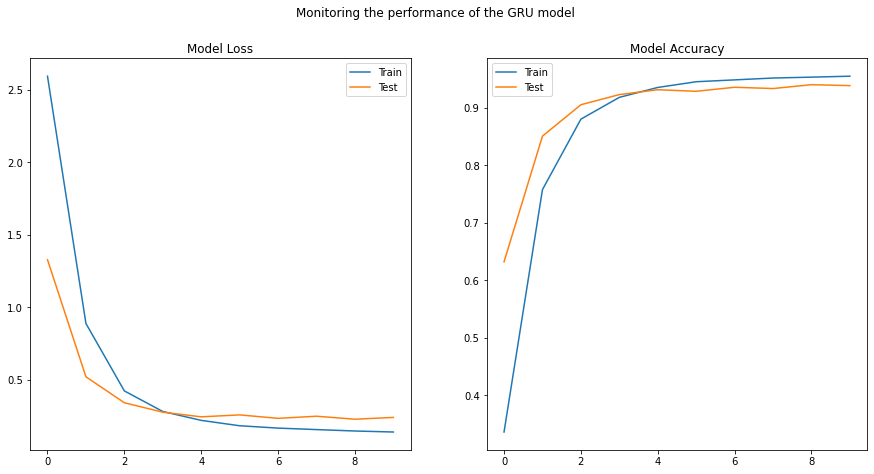

In [208]:
#visualizing model performance  - loss and accuracy 
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 7.2))
f.suptitle('Monitoring the performance of the GRU model')

ax1.plot(model_GRU_history.history['loss'], label = 'Train')
ax1.plot(model_GRU_history.history['val_loss'], label = 'Test')
ax1.set_title('Model Loss')
ax1.legend(['Train', 'Test'])

ax2.plot(model_GRU_history.history['accuracy'], label = 'Train')
ax2.plot(model_GRU_history.history['val_accuracy'], label = 'Test')
ax2.set_title('Model Accuracy')
ax2.legend(['Train', 'Test'])

plt.show()

In [209]:
result_ML_final = result_ML_US[['accuracy_training','accuracy_test']]

In [210]:
result_ML_final

accuracy_training accuracy_test
Model                                        
Random Forest           95.9919       94.7837
Xgboost                 89.6099       86.8162
SVC                     94.9223       92.3346
KNN                     91.1686       87.4046
Naive Bayes              72.655       69.2589

In [251]:
result_ML_final.to_excel('result_ML_final.xlsx')

In [214]:
accuracy_training_LSTM = (model_lstm_saved.evaluate(x_train,ytrain)[1])*100
accuracy_test_LSTM = (model_lstm_saved.evaluate(x_test, ytest)[1])*100

accuracy_training_BiLSTM = (model_bi_lstm_saved.evaluate(x_train,ytrain)[1])*100
accuracy_test_BiLSTM = (model_bi_lstm_saved.evaluate(x_test, ytest)[1])*100

accuracy_training_GRU= (model_GRU_saved.evaluate(x_train,ytrain)[1])*100
accuracy_test_GRU = (model_GRU_saved.evaluate(x_test, ytest)[1])*100




197/197 [==============================] - 1s 7ms/step - loss: 0.2260 - accuracy: 0.9399


In [215]:
Result_DL = {'Model' : ['LSTM', 'Bi-LSTM','GRU'],
           'Accuracy score training' :[accuracy_training_LSTM, accuracy_training_BiLSTM, accuracy_training_GRU],
         
         'Accuracy score Test': [accuracy_test_LSTM, accuracy_test_BiLSTM, accuracy_test_GRU]}


Result_DL= pd.DataFrame(Result_DL)
Result_DL

Model  Accuracy score training  Accuracy score Test
0     LSTM                95.510757            93.893129
1  Bi-LSTM                95.594257            93.559158
2      GRU                95.852721            93.988550

In [ ]:
!pip install hyperas

In [ ]:
!pip install keras-tuner

In [218]:
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from keras import layers
import hyperas
from hyperas import optim
from hyperas.distributions import choice, uniform
from hyperopt import Trials, STATUS_OK, tpe
from tensorflow import keras
from kerastuner import BayesianOptimization
import keras_tuner as kt
import random

**Hyper Parameter Tuning for LSTM**

In [234]:

def neural_network(num_neurons=100,act='relu',
                   dropout=0.3,num_class=num_class,maxlen=maxlen,num_words=num_words):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)

    embed = Embedding(num_words,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)

    lstm= LSTM(128)(embed)

    drop=Dropout(dropout)(lstm)

    dense =Dense(num_neurons,activation='relu')(drop)
    
    out=Dense(num_class,activation='softmax')(dense)

    model_lstm= Model(input_layer,out)

    model_lstm.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    return model_lstm
   
model_lstm = KerasClassifier(build_fn=neural_network,verbose=0)
batch_size = [100]
epochs = [10]
num_neurons = [50,100]
dropout = [0.3]
param_grid = dict(batch_size=batch_size,epochs=epochs,
                      num_neurons=num_neurons,
                      dropout=dropout
                     )

grid = GridSearchCV(estimator=model_lstm,param_grid =param_grid,cv=5,n_jobs=-1)

grid_result_lstm = grid.fit(x_train,ytrain)

grid_result_lstm.best_params_

{'batch_size': 100, 'dropout': 0.3, 'epochs': 10, 'num_neurons': 100}

In [235]:
print('Best score LSTM GridSearchCV: ',grid_result_lstm.best_score_)
print('Best param LSTM GridSearchCV: ',grid_result_lstm.best_params_)
print('Execution time LSTM GridSearchCV: ',grid_result_lstm.refit_time_)


Random Best score LSTM GridSearchCV:  0.9213089227676392
Random Best param LSTM GridSearchCV:  {'batch_size': 100, 'dropout': 0.3, 'epochs': 10, 'num_neurons': 100}
Random execution time LSTM GridSearchCV:  62.25522017478943


**Hyper Parameter Tuning for Bi-LSTM**

In [240]:
def neural_network(num_neurons=100,act='relu',
                   dropout=0.3,num_class=num_class,maxlen=maxlen,num_words=num_words):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)

    embed = Embedding(num_words,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)

    bi_lstm= Bidirectional(LSTM(128))(embed)

    drop=Dropout(dropout)(bi_lstm)

    dense =Dense(num_neurons,activation='relu')(drop)
    
    out=Dense(num_class,activation='softmax')(dense)

    model_bi_lstm= Model(input_layer,out)

    model_bi_lstm.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    return model_bi_lstm
   
model_bi_lstm = KerasClassifier(build_fn=neural_network,verbose=0)
batch_size = [100]
epochs = [10]
num_neurons = [50,100]
dropout = [0.3]
param_grid = dict(batch_size=batch_size,epochs=epochs,
                      num_neurons=num_neurons,
                      dropout=dropout
                     )

grid = GridSearchCV(estimator=model_bi_lstm,param_grid =  param_grid,cv=5,n_jobs=-1)
#es = EarlyStopping(monitor='val_accuracy', mode = 'auto', verbose = 0, patience = 5)  
#mc = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=0, monitor='val_accuracy',save_best_only=True, mode='auto')
#lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=2, min_lr=0.0001)
grid_result_bi_lstm = grid.fit(x_train,ytrain)

grid_result_bi_lstm.best_params_

{'batch_size': 100, 'dropout': 0.3, 'epochs': 10, 'num_neurons': 100}

In [241]:
print('Best score Bi-LSTM GridSerach: ',grid_result_bi_lstm.best_score_)
print('Best params Bi-LSTM GridSerach: ',grid_result_bi_lstm.best_params_)
print('Execution time Bi-LSTM GridSerach: ',grid_result_bi_lstm.refit_time_)

Best score Bi-LSTM GridSerach:  0.9176104307174683
Best params Bi-LSTM GridSerach:  {'batch_size': 100, 'dropout': 0.3, 'epochs': 10, 'num_neurons': 100}
Execution time Bi-LSTM GridSerach:  126.1610255241394


**Hyper Parameter Tuning for GRU**

In [242]:
def neural_network(num_neurons=100,act='relu',
                   dropout=0.3,num_class=num_class,maxlen=maxlen,num_words=num_words):
    
    input_layer = Input(shape=(maxlen,),dtype=tf.int64)

    embed = Embedding(num_words,output_dim=200,input_length=maxlen,weights=[embedding_matrix], trainable=True)(input_layer)

    gru= GRU(128)(embed)

    drop=Dropout(dropout)(gru)

    dense =Dense(num_neurons,activation='relu')(drop)
    
    out=Dense(num_class,activation='softmax')(dense)

    model_gru= Model(input_layer,out)

    model_gru.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

    return model_gru
   
model_gru = KerasClassifier(build_fn=neural_network,verbose=0)
batch_size = [100]
epochs = [10]
num_neurons = [50,100]
dropout = [0.3]
param_grid = dict(batch_size=batch_size,epochs=epochs,
                      num_neurons=num_neurons,
                      dropout=dropout
                     )
from sklearn.model_selection import RandomizedSearchCV
grid = GridSearchCV(estimator=model_gru,param_grid=param_grid,cv=5,n_jobs=-1)
#es = EarlyStopping(monitor='val_accuracy', mode = 'auto', verbose = 0, patience = 5)  
#mc = ModelCheckpoint('model-{epoch:03d}-{val_accuracy:03f}.h5', verbose=0, monitor='val_accuracy',save_best_only=True, mode='auto')
#lr_reduction = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience=2, min_lr=0.0001)
grid_result_gru = grid.fit(x_train,ytrain)

grid_result_gru.best_params_

{'batch_size': 100, 'dropout': 0.3, 'epochs': 10, 'num_neurons': 50}

In [243]:
print('Best score GRU GridSearchCV: ',grid_result_gru.best_score_)
print('Best params GRU GridSearchCV: ',grid_result_gru.best_params_)
print('Execution time GRU GridSearchCV: ',grid_result_gru.refit_time_)

Best score GRU GridSearchCV:  0.9216267585754394
Best params GRU GridSearchCV:  {'batch_size': 100, 'dropout': 0.3, 'epochs': 10, 'num_neurons': 50}
Execution time GRU GridSearchCV:  54.90041136741638


**RESULT COMPARISON**

In [254]:
result_ML_DL_final = pd.read_excel('/content/sample_data/result_ML_DL_final.xlsx')
result_ML_DL_final

Model  accuracy_training  accuracy_test
0  Random Forest          95.991888      94.783715
1        Xgboost          89.609925      86.816158
2            SVC          94.922263      92.334606
3            KNN          91.168635      87.404580
4    Naive Bayes          72.654976      69.258906
5           LSTM          95.510757      93.893129
6        Bi-LSTM          95.594257      93.559158
7            GRU          95.852721      93.988550

In [270]:
print('Best score LSTM GridSearchCV: ',(grid_result_lstm.best_score_)*100)
print('Best score Bi-LSTM GridSerach: ',(grid_result_bi_lstm.best_score_)*100)
print('Best score GRU GridSearchCV: ',(grid_result_gru.best_score_)*100)
print("Best score Random Forest GridSearchCV: ", ( RF_CV_Fit.best_score_)*100)

Best score LSTM GridSearchCV:  92.13089227676392
Best score Bi-LSTM GridSerach:  91.76104307174683
Best score GRU GridSearchCV:  92.16267585754395
Best score Random Forest GridSearchCV:  94.03951633211271




1.   The GRU model gives a better accuracy among Deep Learning models through Grid Search CV at 92.16%. 

2.   The Random Forest model gives highest accuracy for Machine Learning models and all models at 94.03%

3. We have also seen Random Forest has higher accuracy, precision and recall in the first cut among all models.

